# Introduction to Logistic Regression Section
* We have explored how to use Linear Regression and its many variations to predict and continuous label
* But how can we predict a categorial label?
    * The answer will be Logistic Regression
* Logistic Regression
    * Don't be confused by the use of the term "regression" in its name!
    * Logistic Regression is a **classification** algorithm designed to predict **categorial** target labels.
* Logistic Regression Section Overview
    * Transformation Linear Regression to Logistic Regression (using the sigmoid function otherwise known as the logistic function) (from continuous label => categorical
    * Mathematical Theory behind Logistic Regression
    * Simple Implementation of Logisitc Regression for Classification Problem
    * Interpreting results
        * Odds ratio and coeffcients
        * Classification Metrics
            * Accuracy
            * Precision
            * Recall
        * ROC - Receiver operator characteristic Curves
    * Multiclass Classification with logistic regression
    * Logistic regression project
    * Logistic regression project solutions
* Logistic Regression will allow us to predict a categorical label based on historical feature data
* The categorical target column is two or more discrete class labels.
* Classification algorithms predict a class or category label:
    * Class 0: Car Image
    * Class 1: Street Image
    * Class 2: Bridge Image
* You may not have realized you are helping Google label class data!
* Keep in mind, any continuous target can be converted into categories through `discretization`
    * Class 0: House Price 0-100k
    * Class 1: House Price 100k-200k
    * Class 2: House Price <200k
* Classification algorithms also often produce a **probability** prediction of belonging to a class:
    * Class 0: 10% Probability - Car image
    * Class 1: 85% Probability - Street image
    * Class 2: 5% Probability - Bridge Image
        * Model reports back prediction of Class 1 image is street
* Also not our prediction $\hat{y}$ will be a category, meaning we won't be able to calculate a difference based on $y - \hat{y}$
    * **Car Image - Street Image** does not make sense
* We will need to discover a completely different set of error metrics and performance evaluation!

# Theory and Intuition
### Part One: The logistic function
* Logistic Regression works by transforming a Linear Regression into a classification model through the use of the logistic function:
* Let's begin by understanding the history and motivation behind the logistic function (a.k.a the sigmoid function):
    * $\sigma(x) = \frac{1}{1+e^{-x}}$
* Note:
    * For now, we're only referring to the logistic function itself, not the logistic regression model!
* The history of logistic function
    * 1830-1850: Under guidance of Adolphe Quetelet, Pierre Francoi Verhulst developed the logistic function
        * Developed for the purposes of modeling population growth
        * <img src="https://useruploads.socratic.org/22oMsRQRSVuV8oFyGFQ3_Figure_45_03_01.jpg">
        * Logistic tends to level off in both X positive and X negative value
        * Why the need for a logistic function versus a logarithmic function
        * Note: There is a "family" of logistic functions
        * Also notice **any** value of **x** will have an output range between 0 and 1
        * Many natural real world systems have "carry capacity" or natural limiting factor that lead to the level off

    * 1883: Logistic function was independently developed in chemistry as a model of autocatalysis by Wilhelm Ostwald
    * 1940s: Using the logistic function for statistical modeling was developed by Joseph Berkson\
    * 1944: "Application of the logistic function to bio-assay" in the Journal of the American Statistical Association
    * Let's continue on by seeing how a linear regression is unable to solve classification problems effectively and how the logistic function can fix this!



### Part two: Linear to Logistic Intuition
* Let's explore how convert a Linear Regression model used for **regression task** into a Logistic Regression model used for a **classification task**
* Imagine a dataset with a single feature (previous year's income) and a single target label (loan default)
* Our data set:


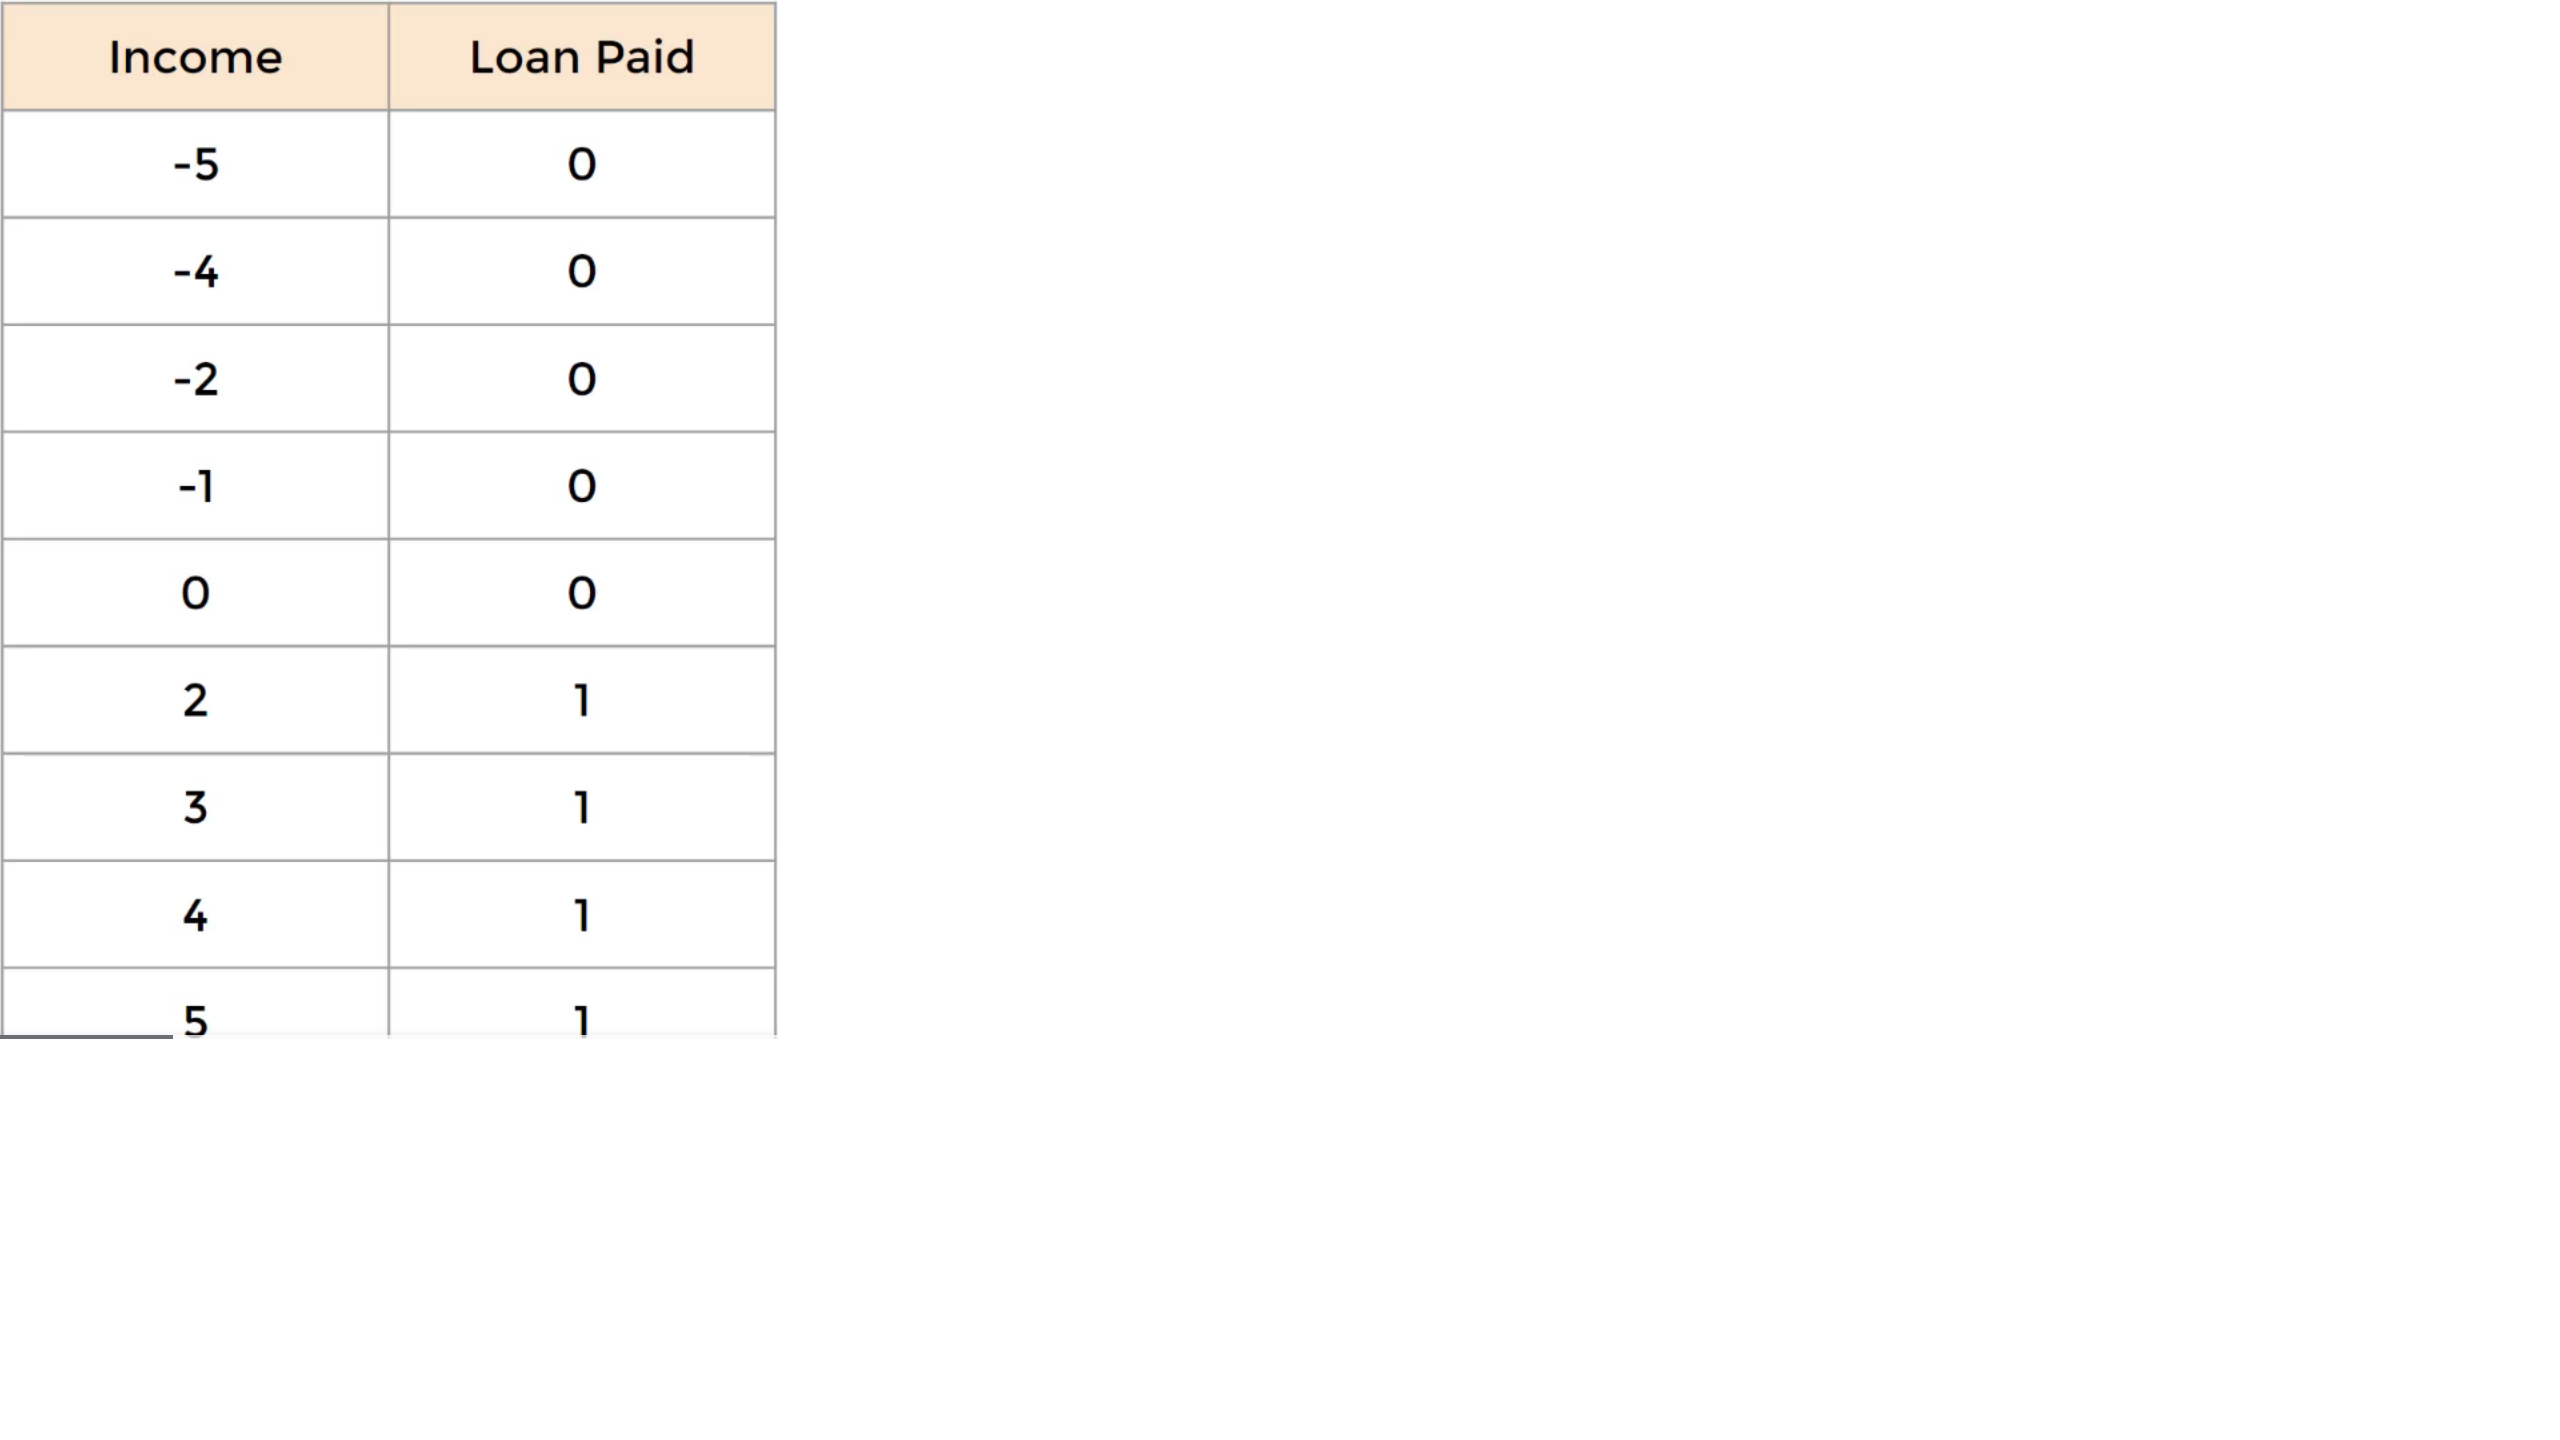

In [1]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\11-Logistic-Regression-Models\1.png")

* Let's begin by plotting income versus default
* Notice that people with negative income tend to default on their loans
* What if we had to predict default status given someone's income?

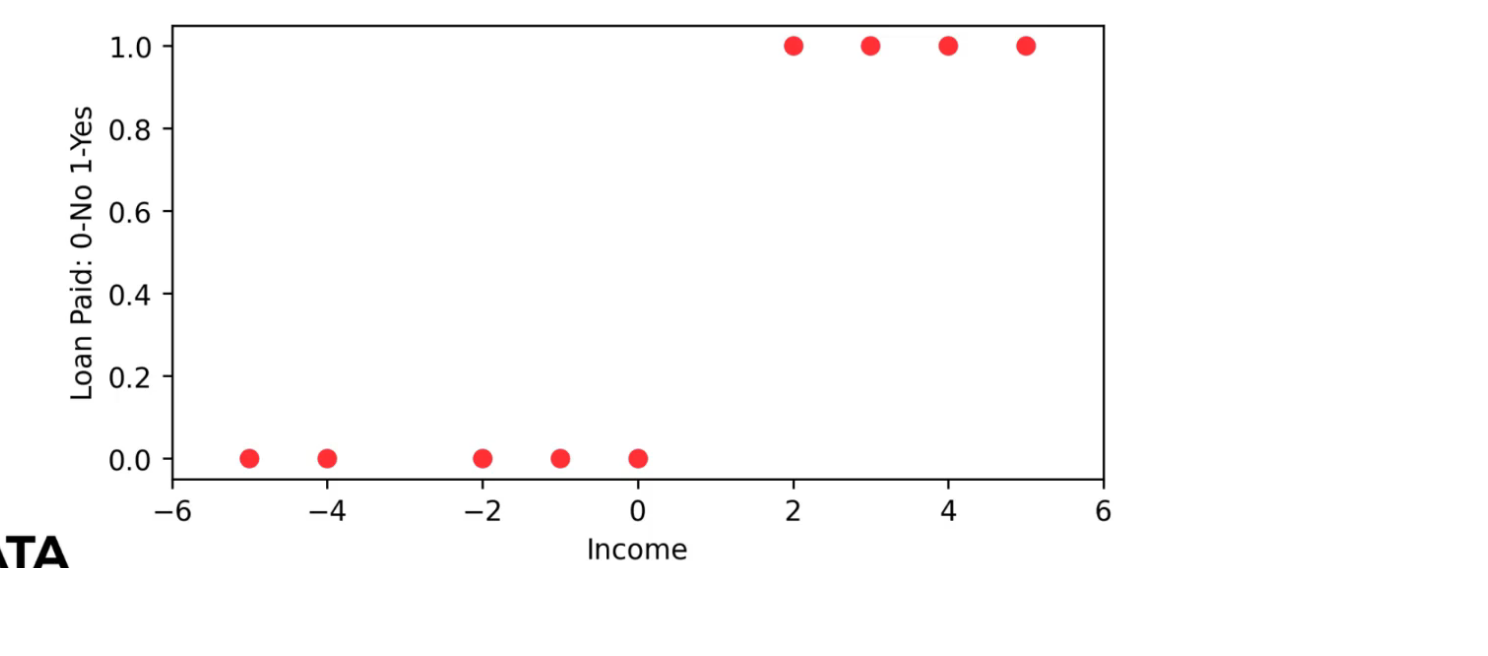

In [2]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\11-Logistic-Regression-Models\2.png")

* Fitting a linear regression would not work (recall Anscombe's Quartet)
* Linear Regression easily distorted by only having 0 and 1 as possible y training values.
* Also would be unclear how to interpret predicted y values between 0 and 1

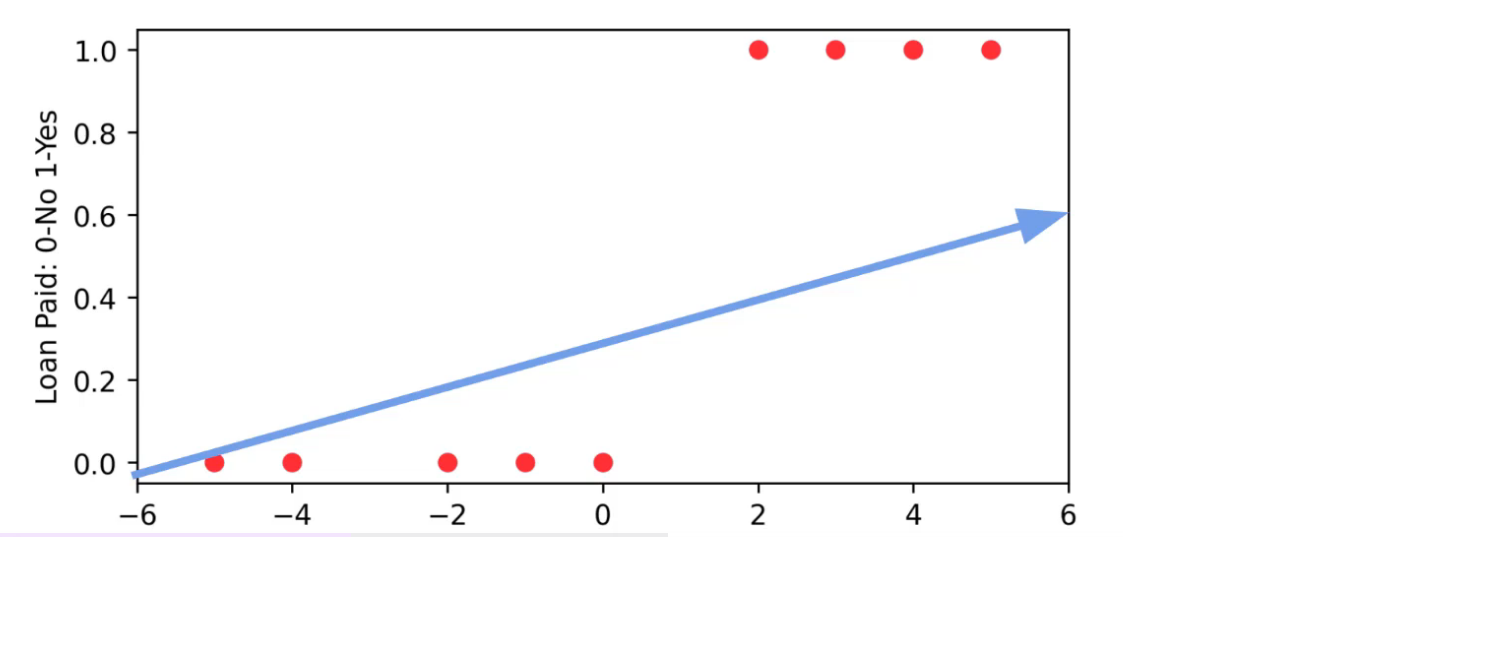

In [3]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\11-Logistic-Regression-Models\3.png")

* We could make use of the Logistic Function for a conversion!
* Change from the linear regression fit into logistic function

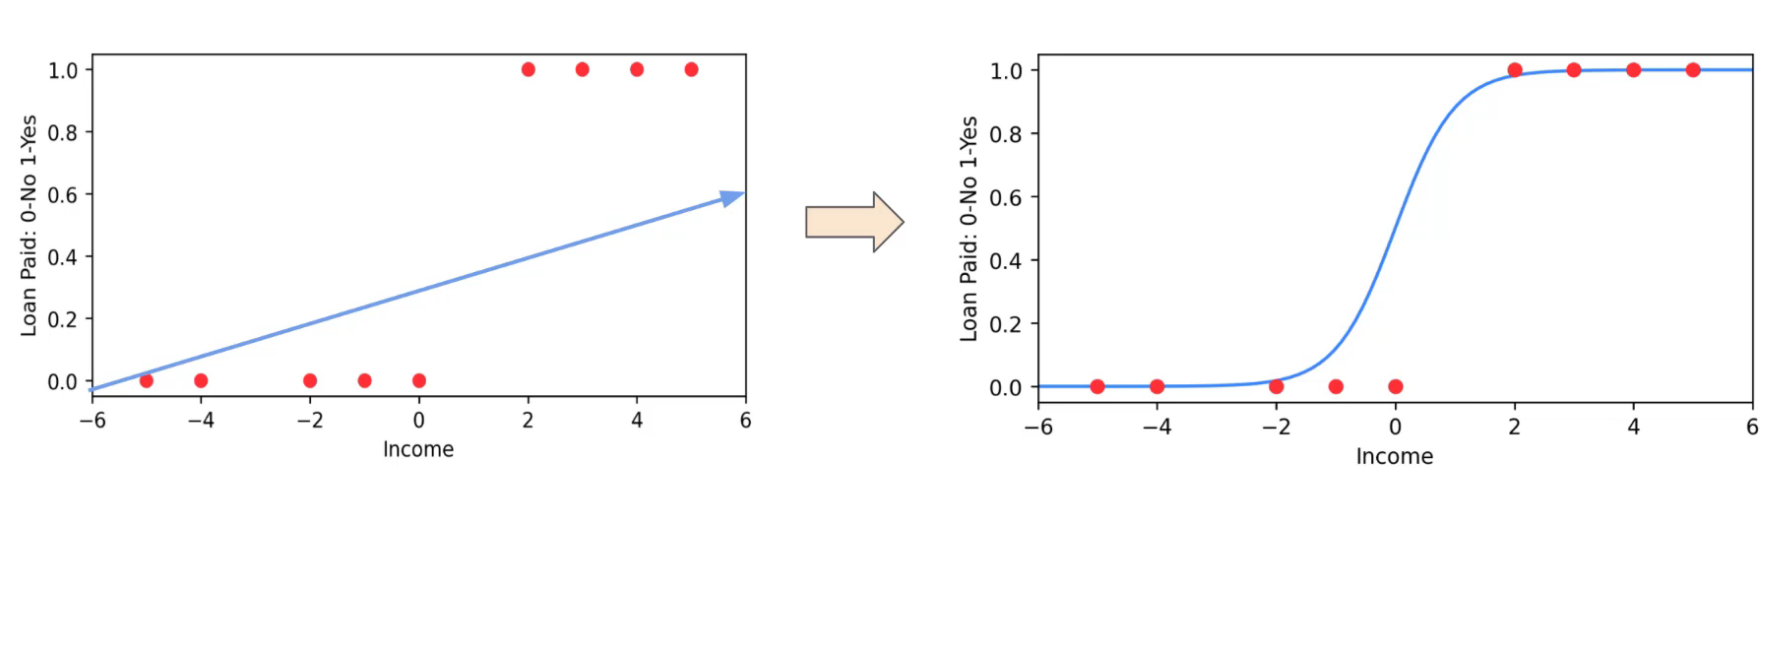

In [4]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\11-Logistic-Regression-Models\4.png")

* Let's first focus on what this Logistic Regression would look like
* Treat the y-axis as a probability of belonging to a class
* Treat P(y=1) >= 0.5 as a **cut-off** for classification
* The probability of y = 1 is equal to where this lines along Y axis



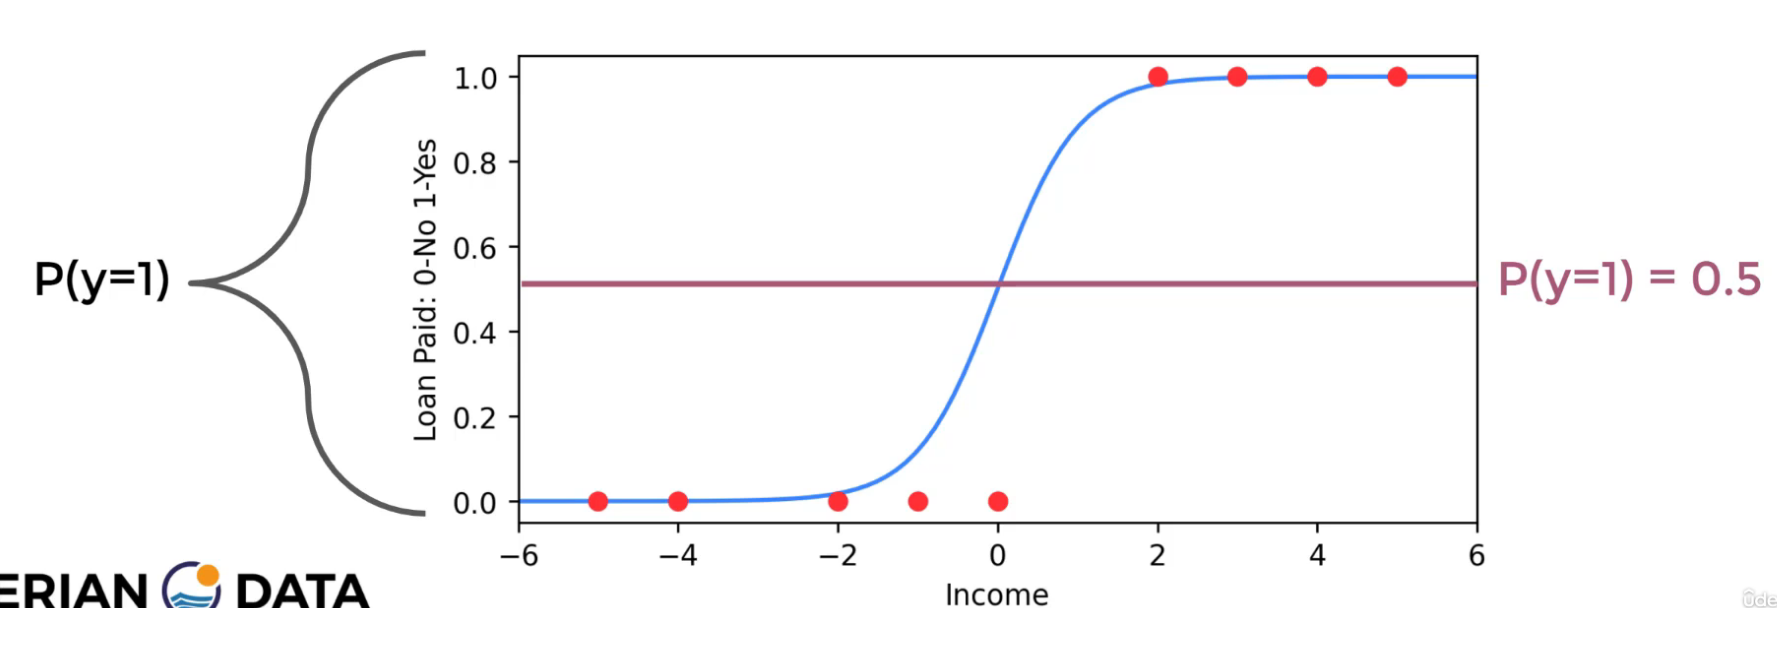

In [5]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\11-Logistic-Regression-Models\5.png")

* For example, a new person with an income of 1:
* Predict a 90% probability of paying off loan, return prediction of Loan paid = 1
* My cut-off is 0.5 so anything that greater than 0.5 is going to be pushed up to be a return of 1
* 90% sure this will be the outcome
* But how do we actually create this line?
* Fortunately, the mathematics of the conversion are quite simple!
* In the next lecture we will go through the mathematical process of this conversion

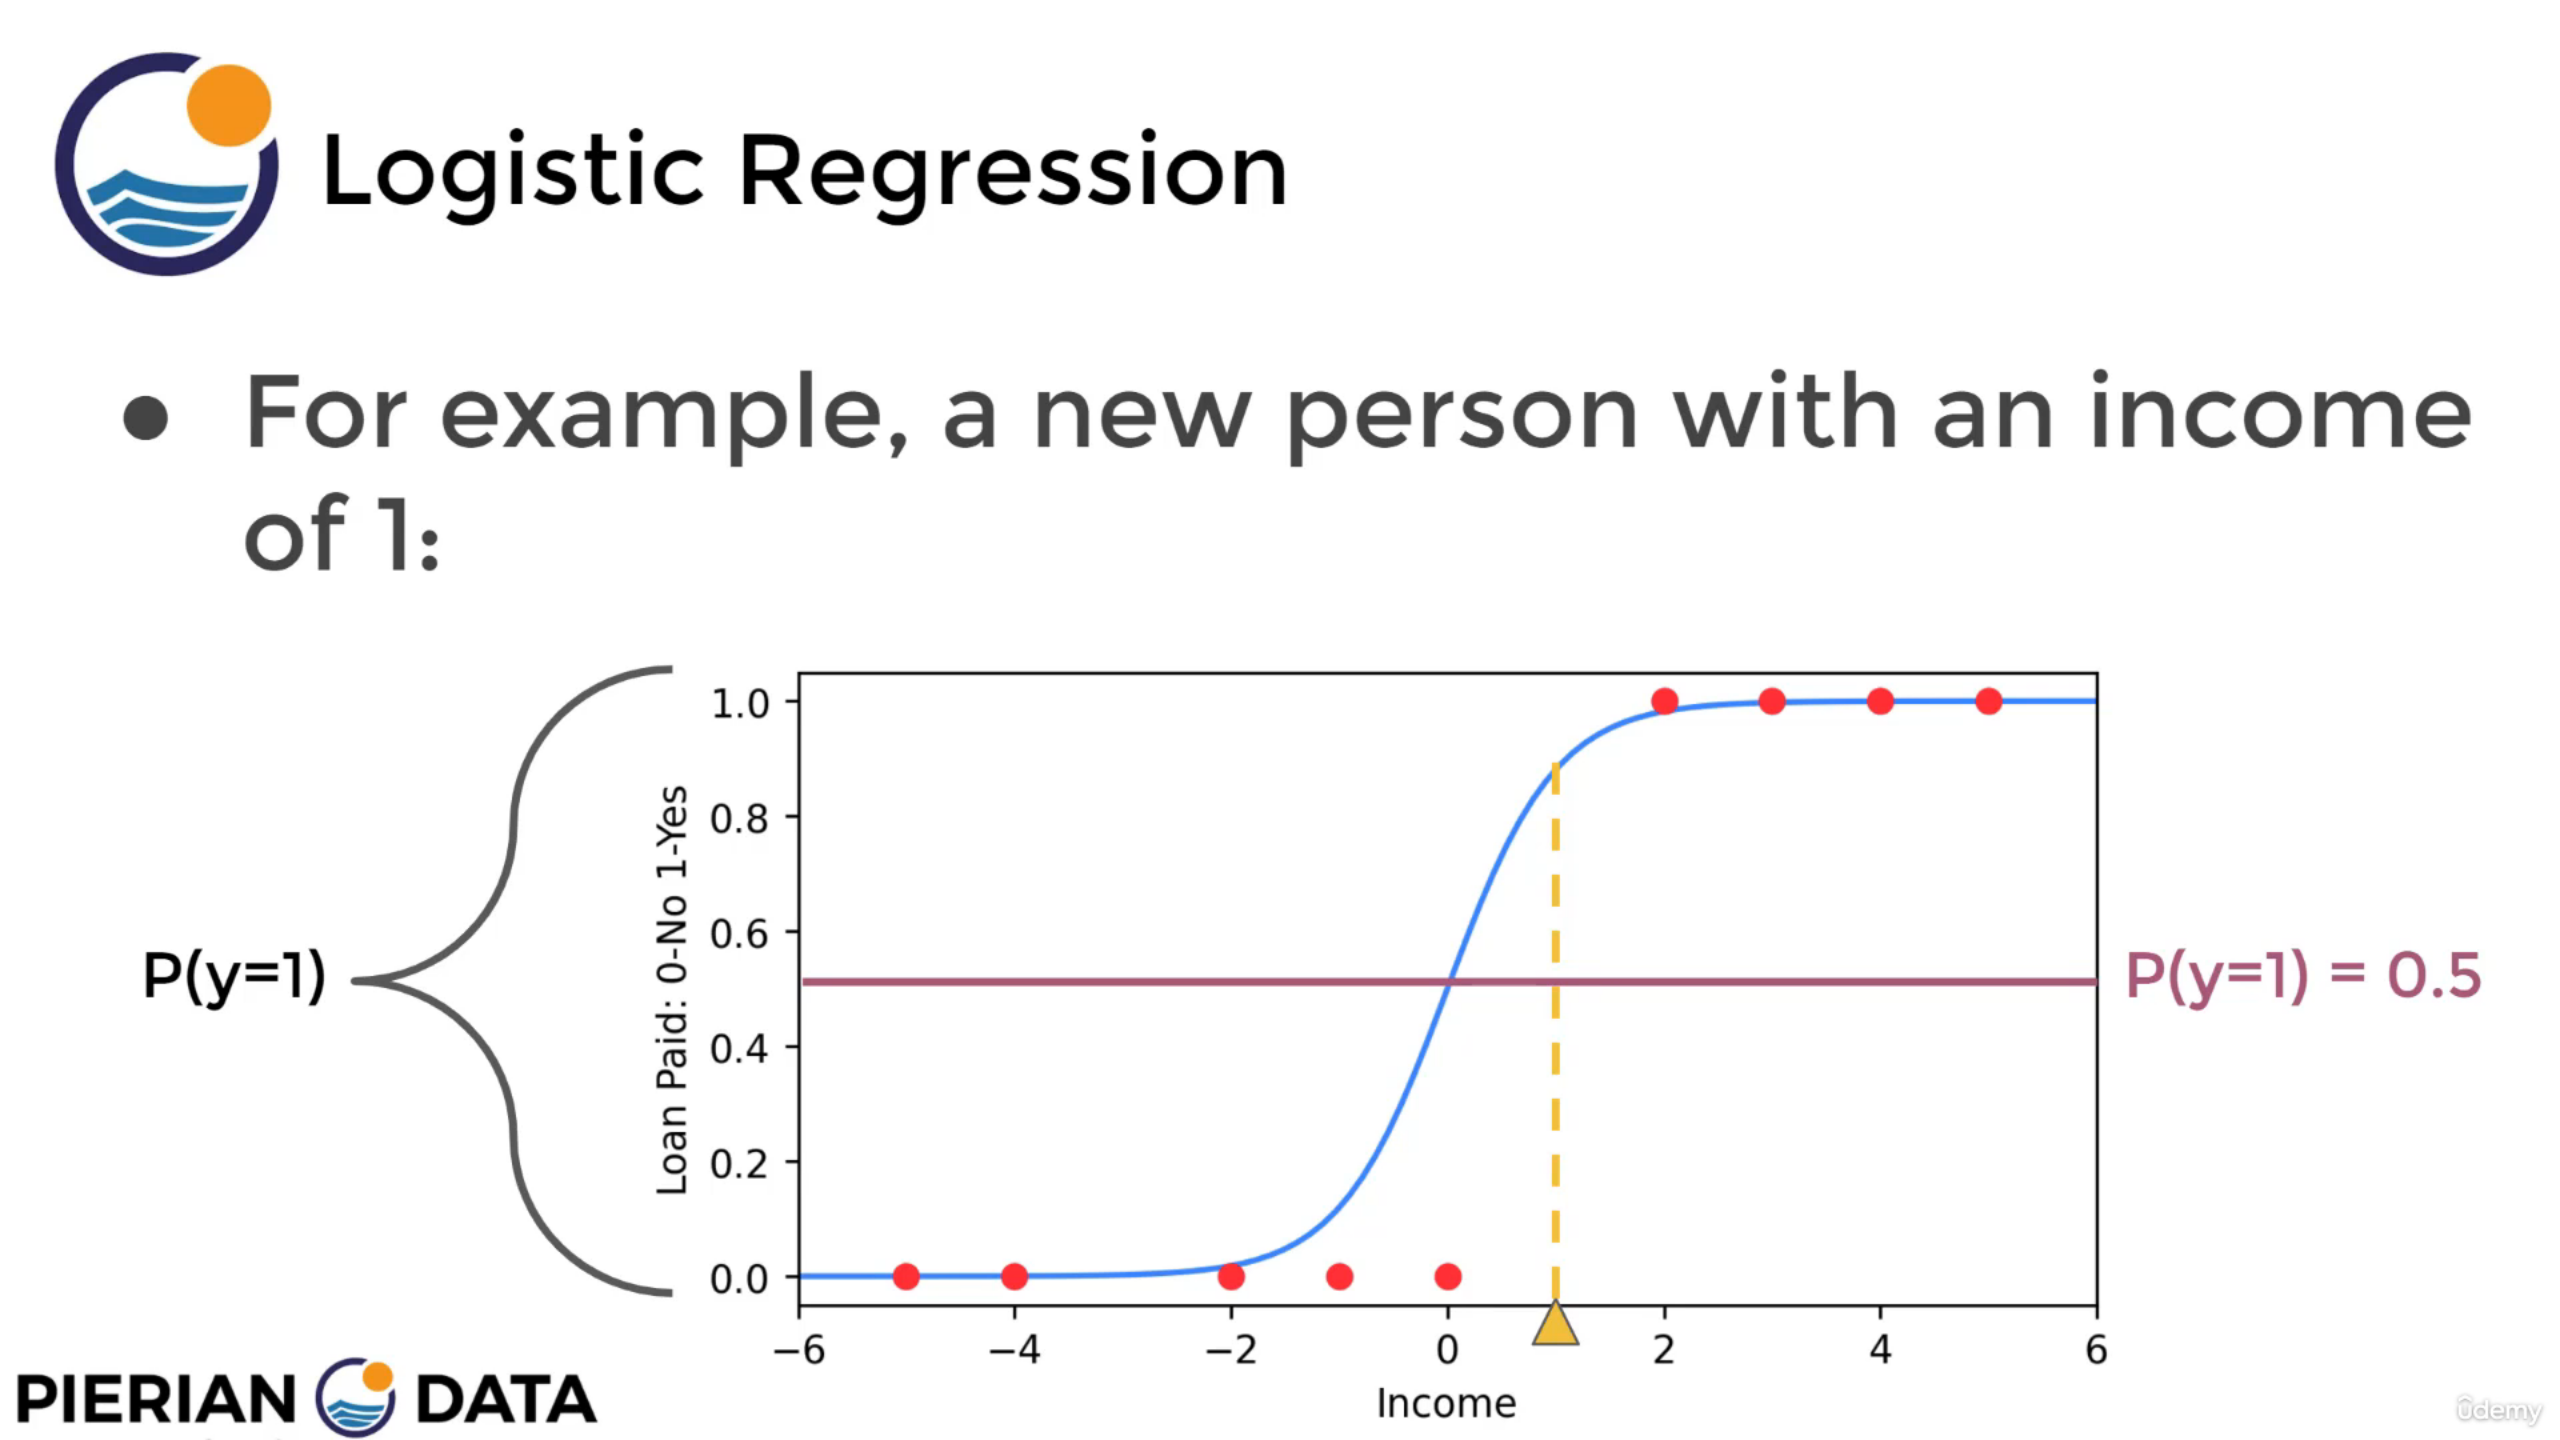

In [7]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\11-Logistic-Regression-Models\7.png")

## Part two: Linear to Logistic Math
* Let's go through the math of converting Linear REgression to Logistic Regression
* Relevant ISLR reading:
    * Section 4.3 Logistic Regression
* We already know the Linear Regression equation:
    $\hat{y} = \beta_0x_0 + ... + \beta_nx_n$
    $\hat{y} = \sum_{i=0}^n\beta_ix_i$
* We also know the Logistic function transforms any input to be between 0 and 1
    $\sigma(x) = \frac{1}{1+e^{-x}}$
* All we need to do is plug the linear regression equation into the Logistic function to create a Logistic regression
    * $\hat{y} = \sum_{i=0}^n\beta_ix_i$ => $\sigma(x) = \frac{1}{1+e^{-x}}$
* Simply put in terms of the logistic function:
    * $\hat{y} = \sigma(\beta_0x_0 + ... + \beta_nx_n)$
    * $\hat{y} = \sigma(\sum_{i=0}^n\beta_ix_i)$
* Writing it out fully:
    * $\hat{y} = \frac{1}{1+e^{-\sum_{i=0}^n\beta_ix_i}$
* How do we interpret the coefficients ($\beta_i$) and their relation to $\hat{y}$?
* First we need to understand the term **odds**
* A term you may be familiar with form gambling **odds**
* In gambling odds are often referred to in sense of N to 1
* But where does this actually come from?
* The odds of an event with probability **p** is defined as the chance of the event happening divided by the chance of the event not happening:
    * $\frac{p}{1-p}$
* Imagine an event with **50%** probability of occuring. This is **0.5/(1 - 0.5)** which is **0.5/0.5**, the same as **1/1** or **1 to 1 odds of occuring**
* Taking the formula below, we can rearrange it to show that it is equivalent to modelling the log of the odds as a linear combination of the features.
    * $\hat{y} = \frac{1}{1+e^{-\sum_{i=0}^n\beta_ix_i}$
    * This will allow us to solve for the coefficients and feature x in terms of **log odds** - the natural logarithm of the odds ratio
    * Solving for **log odds**
        * $\hat{y} = \frac{1}{1+e^{-\sum_{i=0}^n\beta_ix_i}$
        * $\hat{y} + \hat{y}e^{-\sum_{i=0}^n\beta_ix_i} = 1$
        * $\hat{y}e^{-\sum_{i=0}^n\beta_ix_i} = 1 - \hat{y}$
        * $ \frac{\hat{y}}{1-\hat{y}} = e^{\sum_{i=0}^n\beta_ix_i}$ (do a reciprocal and flip)
        * $\ln(\frac{\hat{y}}{1-\hat{y}}) = \sum_{i=0}^n\beta_ix_i$ (canceling it with the natural log based `e`)
        * The log odds being equal to this linear relationship of the beta coefficient
    * What would the function curve look like in terms of log odds?
    * Treating Y as a probability belonging to the one class because it just goes from zero to one
    * Convert the $\hat{y}$ into the $\ln(\frac{\hat{y}}{1-\hat{y}})$
        * Consider p = 0.5
            * $\ln(\frac{0.5}{1-0.5}) = 0$ (the same as 1/1 or $\ln(\frac{1}{1}) = 0$)
            * The half way point now at 0
            * As p goes to 1 then log odds become $\infty$
                * $\lim_{p->1}\ln(\frac{p}{1-p}) = \infty$
            * As p goes to 0 then log odds become $-\infty$
                * $\lim_{p->0}\ln(\frac{p}{1-p}) = -\infty$
            * On log scale logistic function is straight line
            * Coeffcients in terms of change in log odds
            * If I show this equation in terms of a linear relationship between beta coefficient and the X feature, then y axis has to be then be in terms of log odds. Because we're coverting things to log odds, my y axis goes from negative infinity to positive infinity, where the class points that are already defined are at negative infinity and positive infinity
            * It transforms from the logistic curve into the straight line or linear line. However, it comes at the cost of having transform Y axis into log odds that go from negative infinity to positive infinity
            * It $\beta$ simple to interpret? Not really, but it is going to be easier than before
            * Since the log odds scale is nonlinear, a $\beta$ value can not be directly linked to "one unit increase" as it could in Linear Regression
            * There are some straightforward insights we can gain however
                * Sign of Coefficient
                    * Positive $\beta$ indicates an increase in likelihood of belonging to 1 class with increase in associated **x** feature
                    * Negative $\beta$ indicates an decrease in likelihood of belonging to 1 class with increase in associated **x** feature
                * Magnitude of Coefficient
                    * Harder to directly interpret magnitude of **$\beta$** directly, especially when we could have discrete or continuous x feature values
                    * We can however begin to use odds ratio, essentially comparing **magnitude** against each other
                    * Comparing magnitudes of coefficients against each other can lead to insight over which features have the strongest effect on prediction output

                * Overall, you can not directly link to "one unit increase" as the Linear Regression. However, you can compare the magnitudes in order to see what features are more important than others or what features have a very strong predictive power
* The last mathematical topic we need to discuss concerning Logistic Regression is how we actually fit this curve
* We'll discuss the basics of fitting the best curve with **maximum likelihood** in next lecture

## Part Three: Finding the Best Fit
* Logistic Regression uses Maximum Likelihood to find the best fitting model.
* This lecture will give you an intuition of how this method workds.
* We'll also then display the cost function and gradient descent that is solved for by the computer
* Quick note: ISLR Section 4.3.2
    * The mathematical details of maximum likelihood are beyond the scope of this book
* Here we see three different Logistic Regression curves with different $\beta$ values
* Depends on your coefficient value => present different curves
* How do we measure which is the best fit?
* Recall in Linear Regression we seek to minimize the Residual Sum of Squares (RSS)


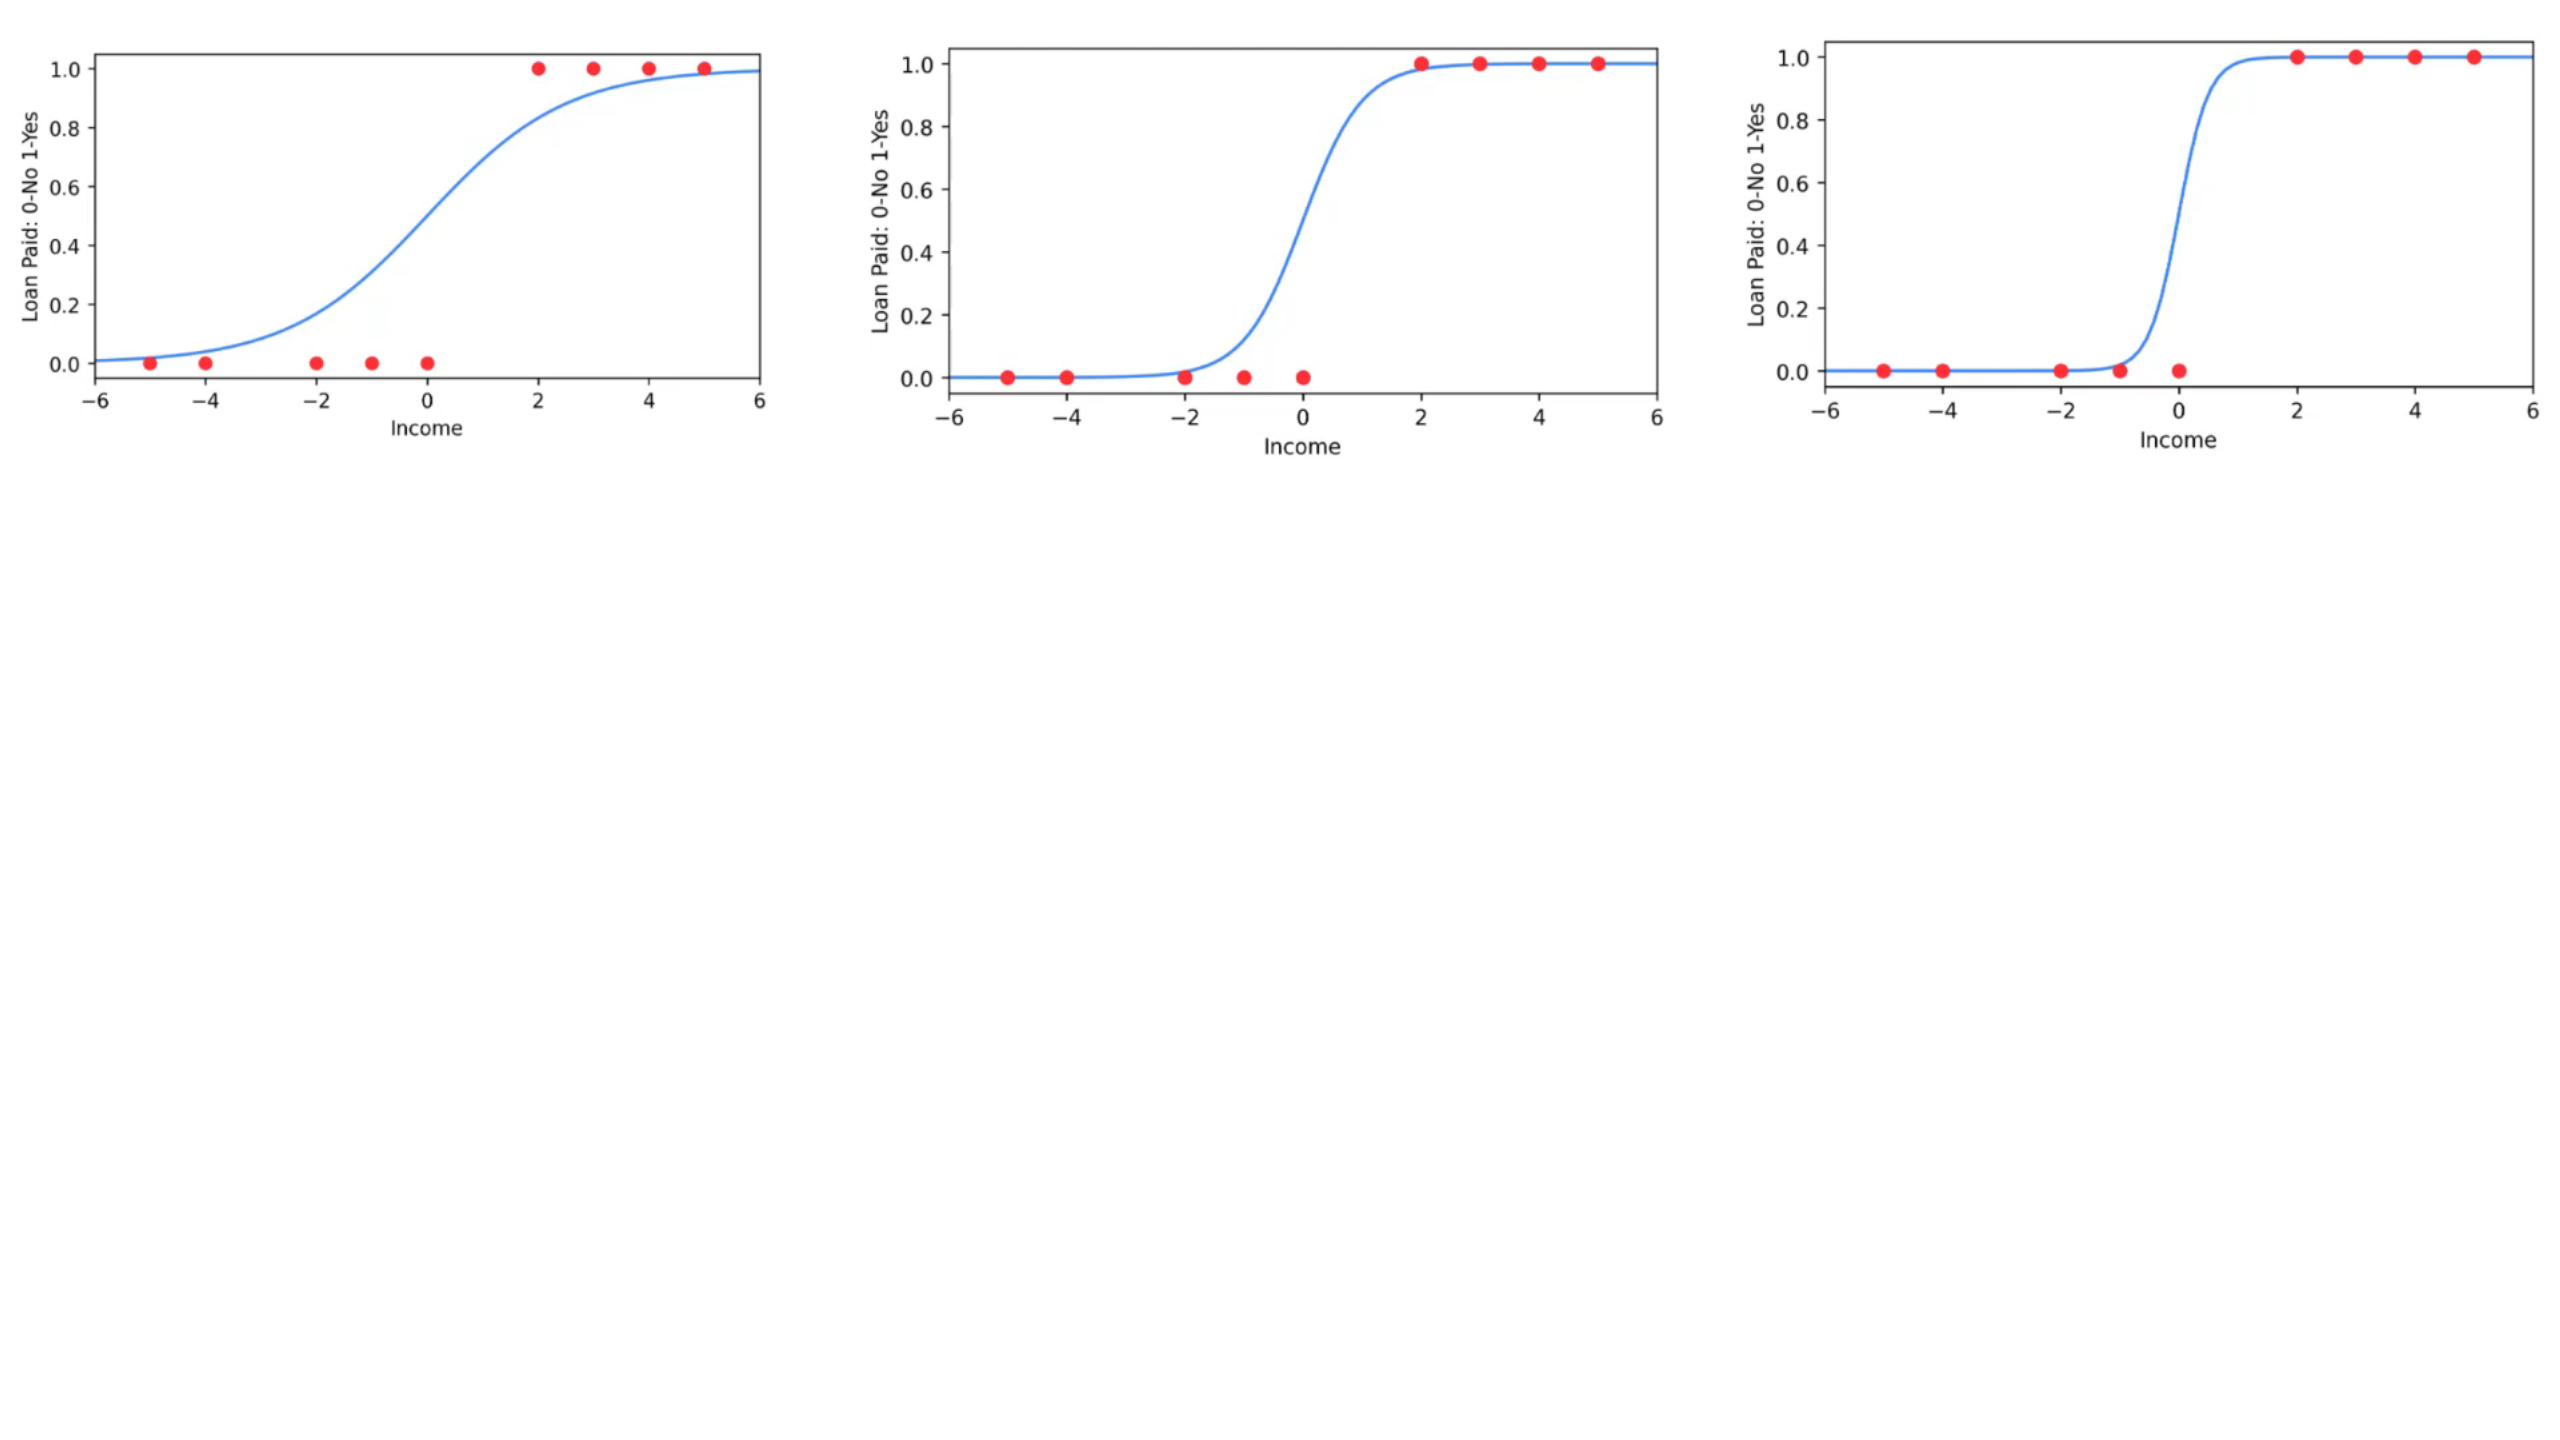

In [1]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\11-Logistic-Regression-Models\8.png")

* Unfortunately, even in log odds targets are at infinity, making RSS unfeasible - because you can't do arithmetic with infinity and negative infinity
* The first step for maximum likelihood is to go from log odds back to probability
    * We already know how to transfer from left hand side ($\hat{y}$ - the probability) to right hand side (the log odds) but don't know how to reserve
    * The following step that allow you to transfer it back from log odds to the probability
        * $\ln(\frac{p}{1-p}) = \ln(odds)$
        * $\frac{p}{1-p} = e^{\ln(odds)}$
        * $p = (1-p)e^{\ln(odds)}$
        * $p = e^{\ln(odds)} - pe^{\ln(odds)}$
        * $p + pe^{\ln(odds)} = e^{\ln(odds)}$
        * $p(1 + e^{\ln(odds)}) = e^{\ln(odds)}$
        * $p= \frac{e^{\ln(odds)}}{1 + e^{\ln(odds)}}$
        * The meaning of this equation is  if you have a value in terms of log odds, you can plug it into this equation and directly get back out the probability of belonging to class one
    * We are now able to convert $\ln(odds)$ into a probability


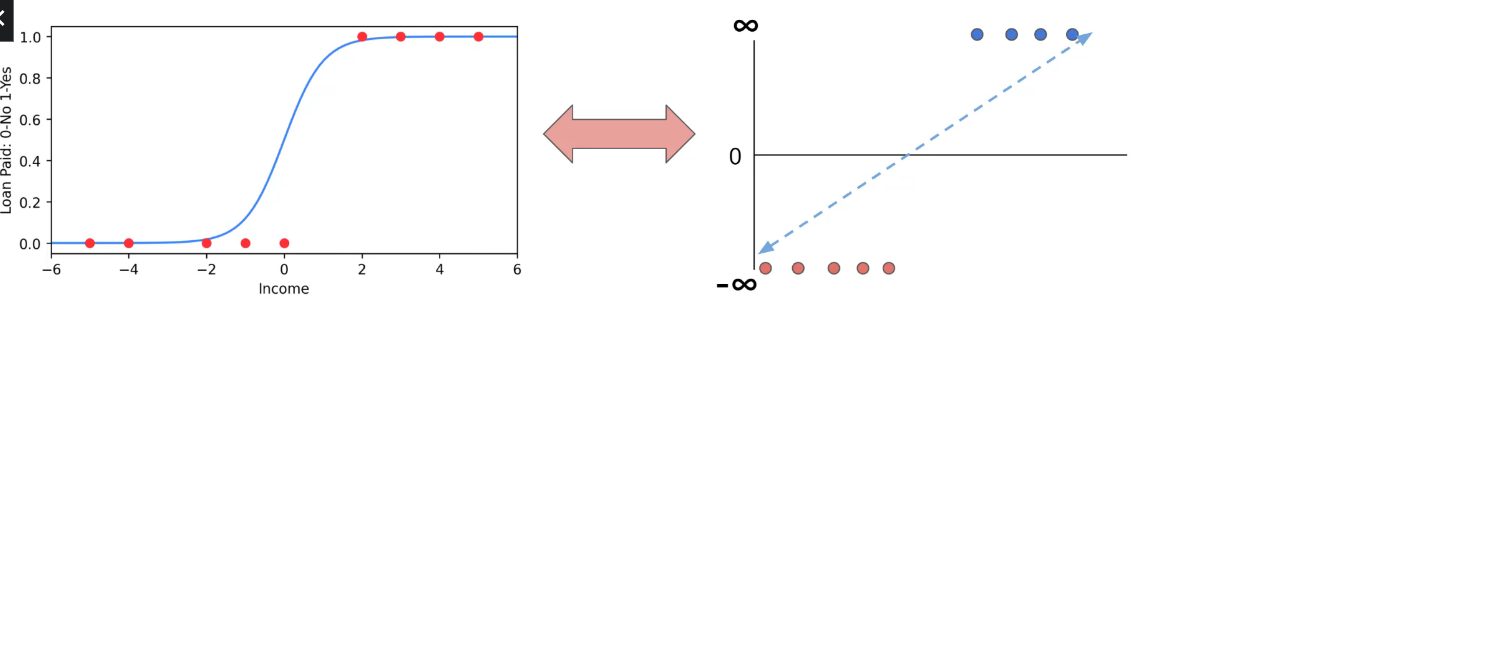

In [4]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\11-Logistic-Regression-Models\9.png")

* Why the converting is important? Let's now explore the intuition behind **maximum likelihood**
* We choose a line in the log(odds) axis and project the points on to the line
* We also know this line has a form on the probability y-axis
* How we actually find out the best model ? We choose a line in the log(odds) axis and project the points on to the line
    * Take the X value and project them onto the line  (the line representing the beta coefficient times that feature value of X) and when I project these points onto this line. they're no longer all the way at negative infinity and infinity, which means I can **actually calculate the log odds for the projected points on this line**.
    * When I have the **log odds**, I can convert these directly to probabilities onto my logistic regression model => plot these values as probabilities on the logistic regression model
    * We now measure the likelihood of these probabilities

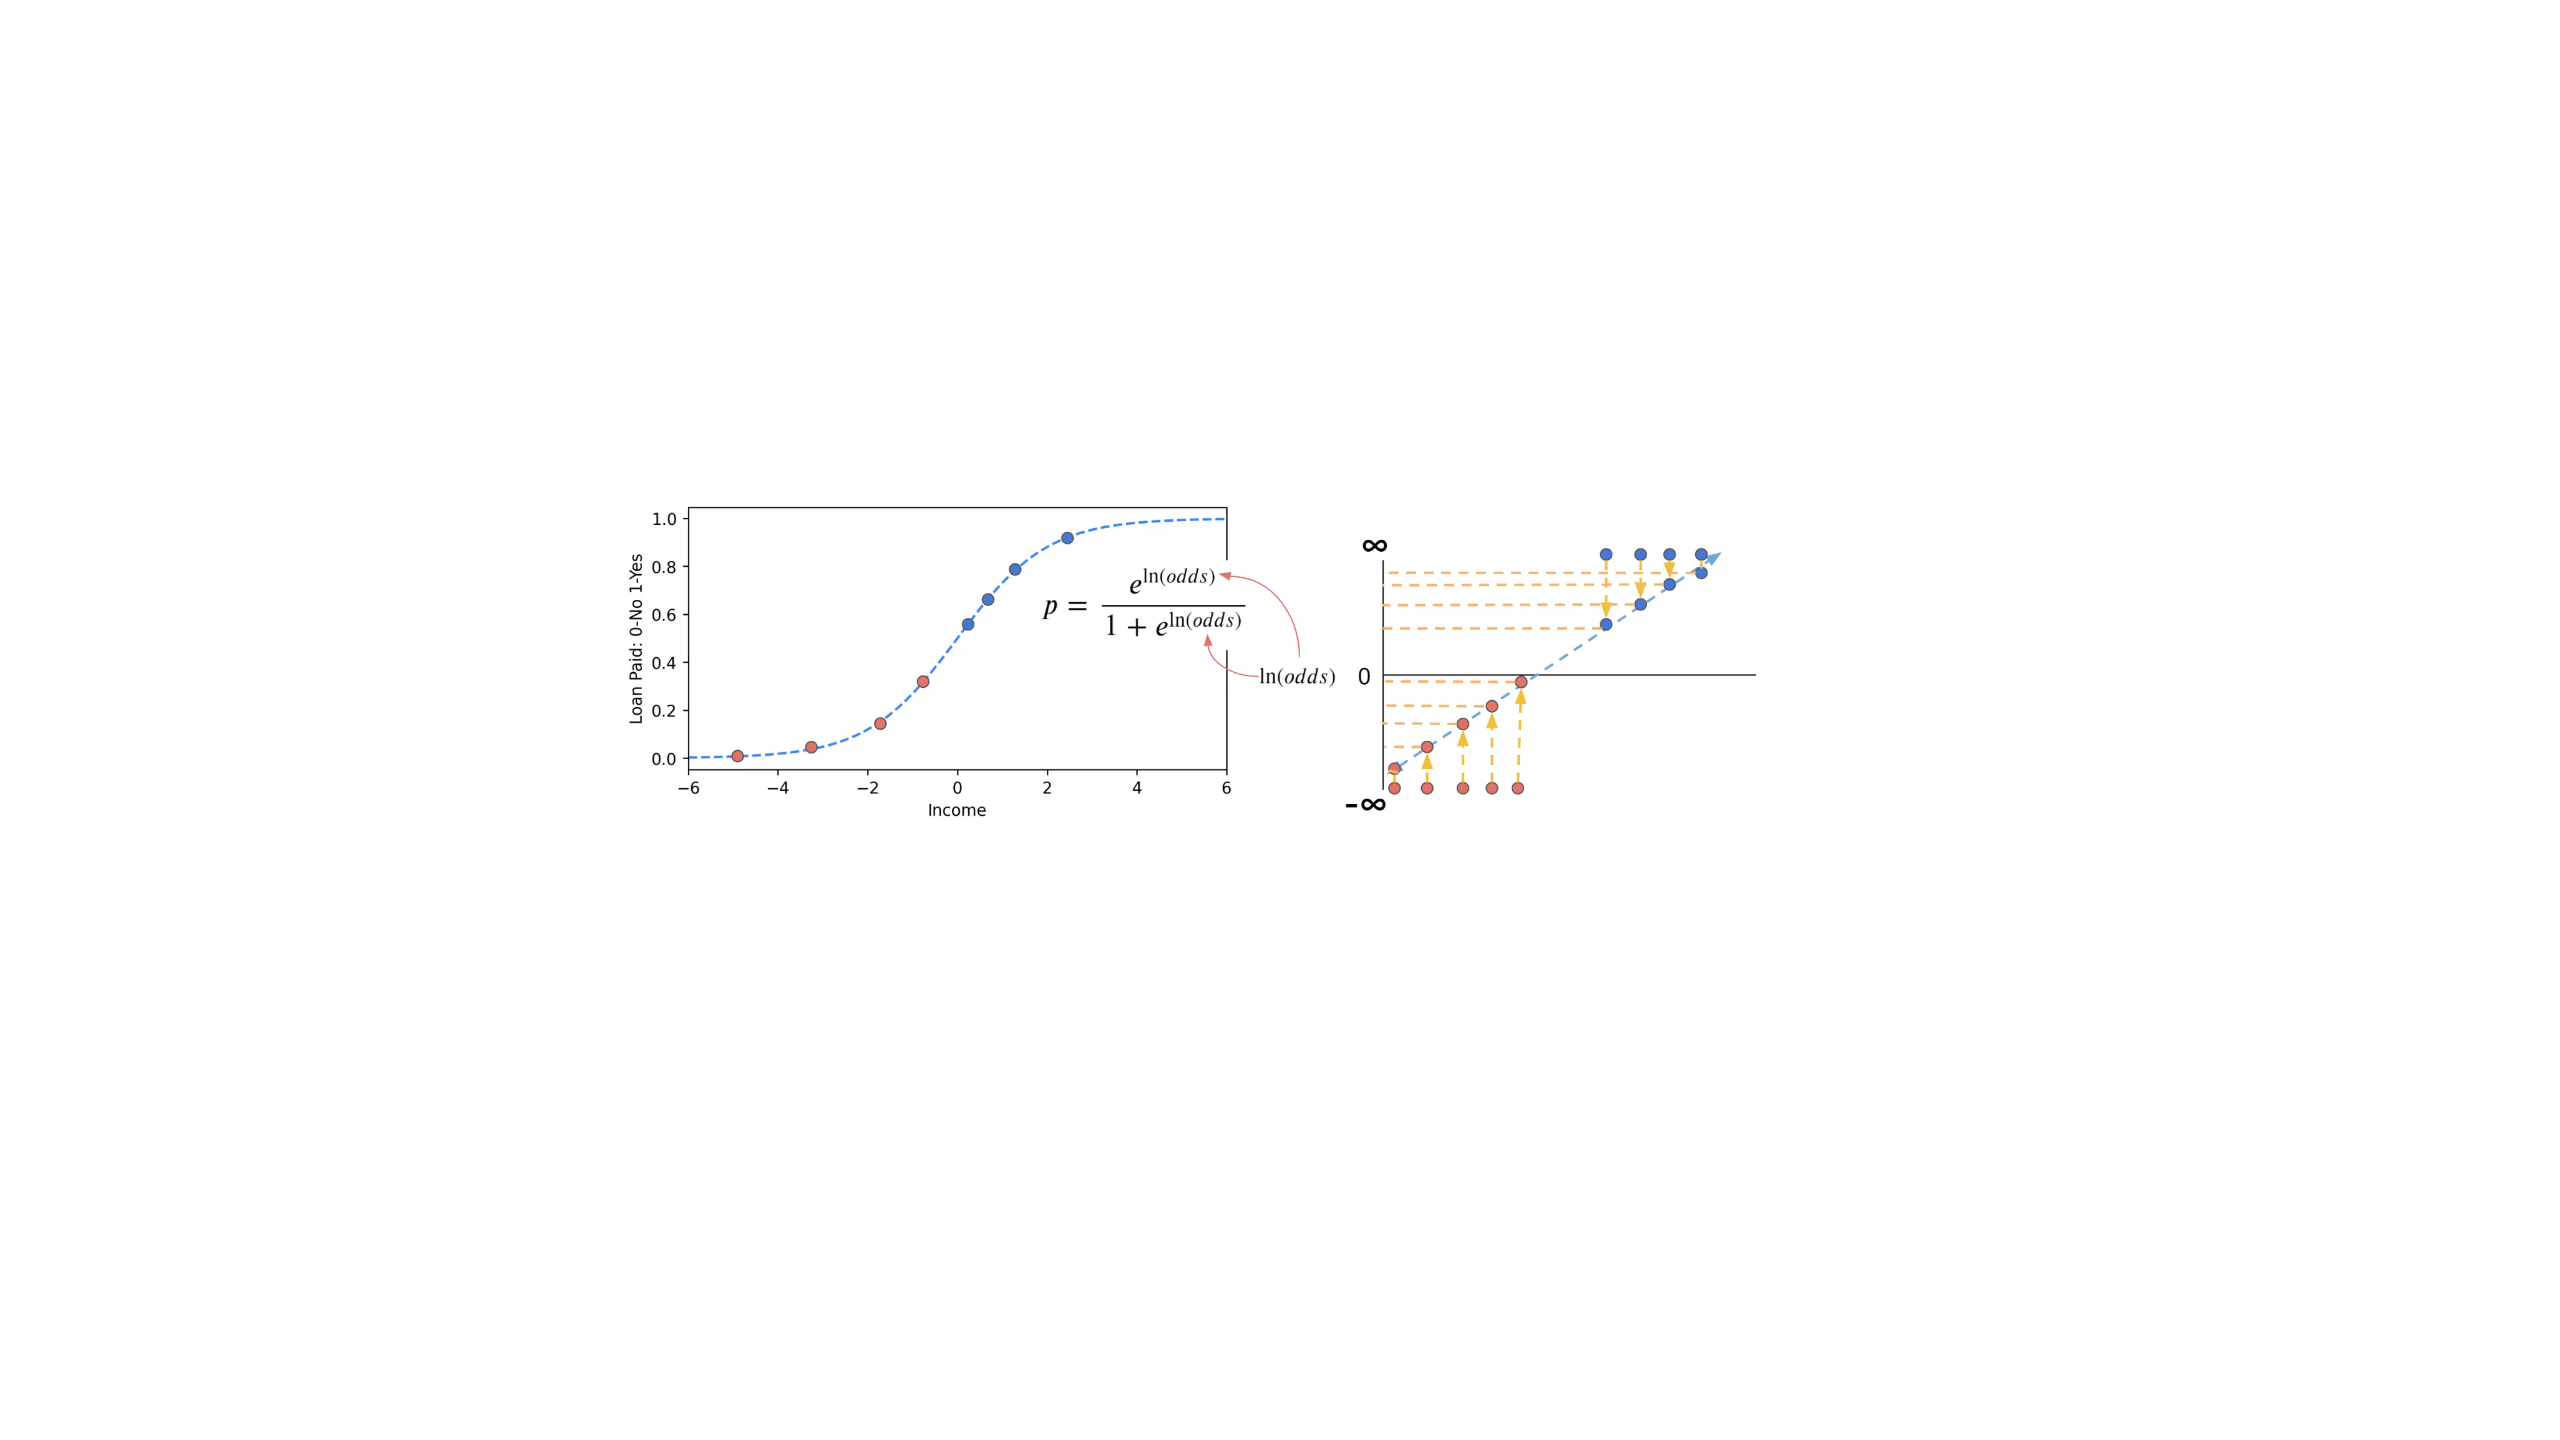

In [5]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\11-Logistic-Regression-Models\10.png")

* Perfect fit model => all blue points should be all the way at 1, since those are the actual values that are classified as one. And my red points should be all the way at zero, since those are the points that I already know at zero
* Recall here that these blue and red point are essentially training data points. Training on this data to find the best fitting logistic regression model. The way, I can do it is in term of **likelihood**
* Likelihood = Product of probabilities of belonging to class 1
    * How actually end up getting this likelihood?
    * If I take a look at the first point of likelihood of belonging the class one at Y hat, it's at 0.9. Then the second point, it's at 0.8, etc
    * Likelihood = 0.9 x 0.8 x 0.65 x 0.55 x ... (for the class one )


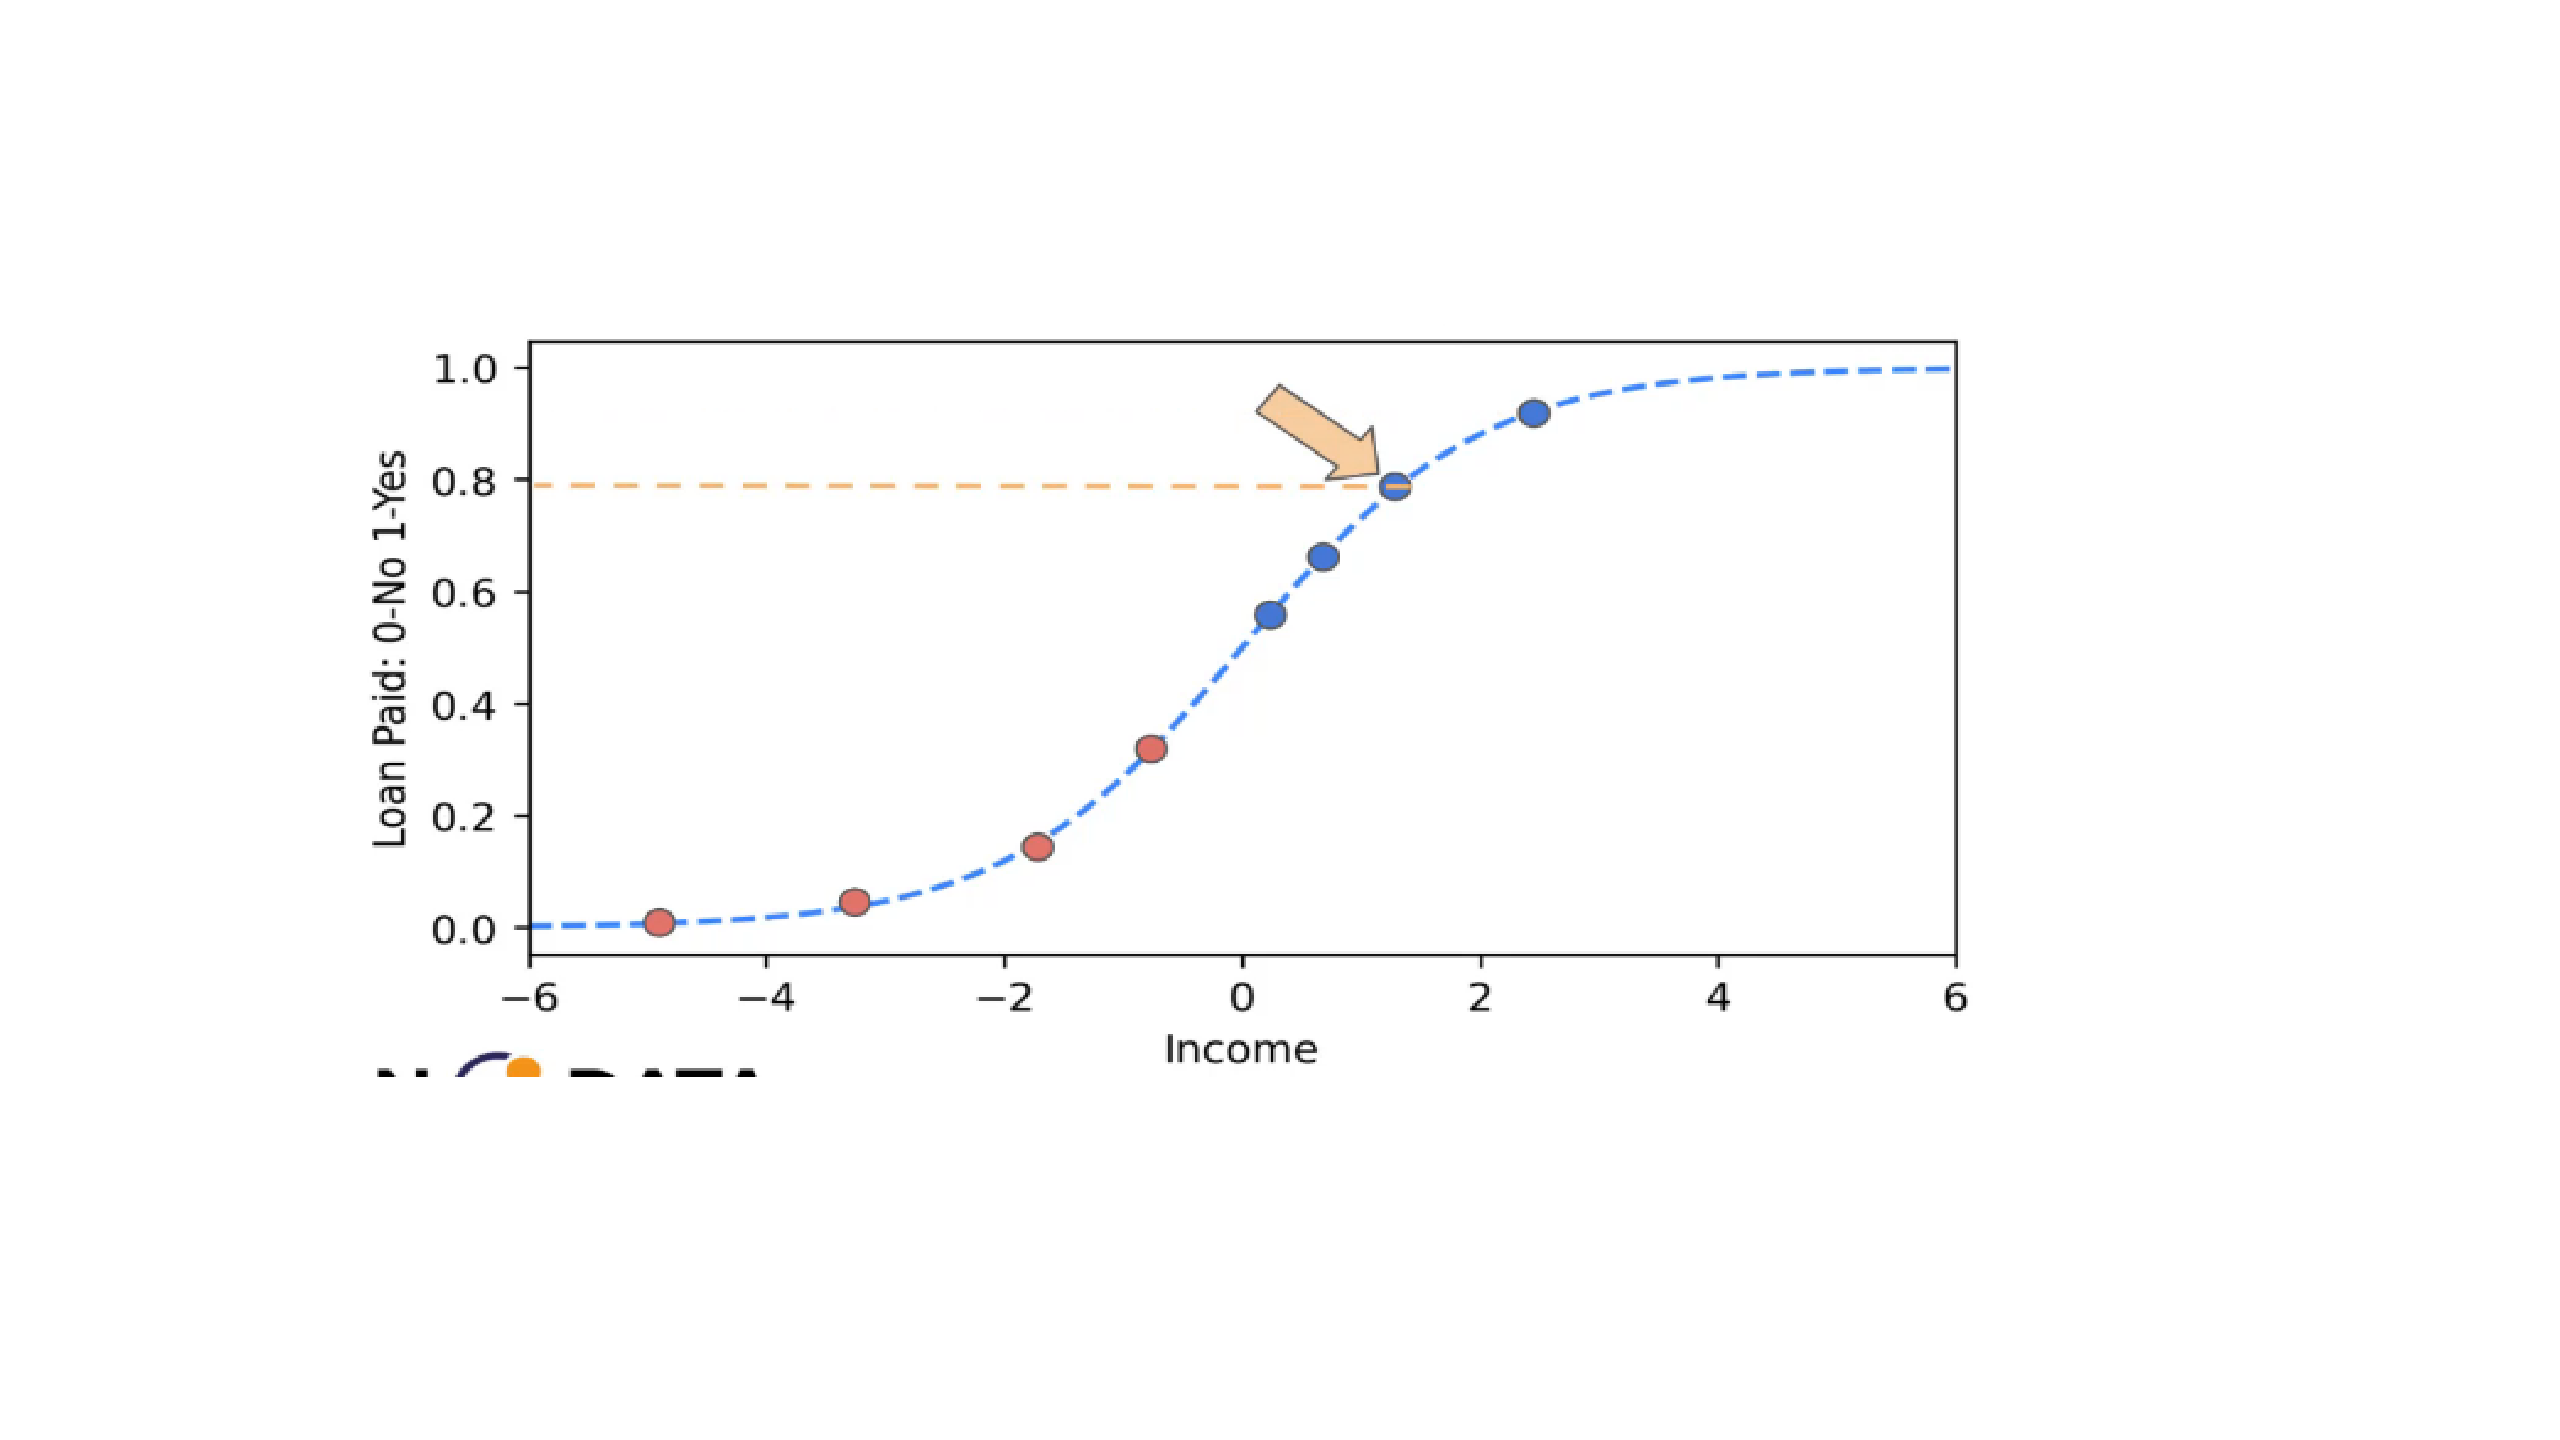

In [6]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\11-Logistic-Regression-Models\11.png")

* Now I have the class zero points, so if we think about Class Zero, I want in term of probability of belonging to Class one. Since it's the other binary events of Class zero, if I want it's probability of belonging to class one, I could just calculate this as **one minus P**
    * Likelihood = 0.9 x 0.8 x 0.65 x 0.55 x (1 - 0.3) x (1 - 0.2) x (1 - 0.08) x (1 - 0.02) = 0.129 ( the value that I want to maximize, I want to get this as close to 1 as possible). Because that means I've fit as best as possible to my training data
    * Note in practice we actually maximize the **log** of the likelihoods (e.g. $\ln(0.9) x \ln(0.8) x \ln(0.7)$...)


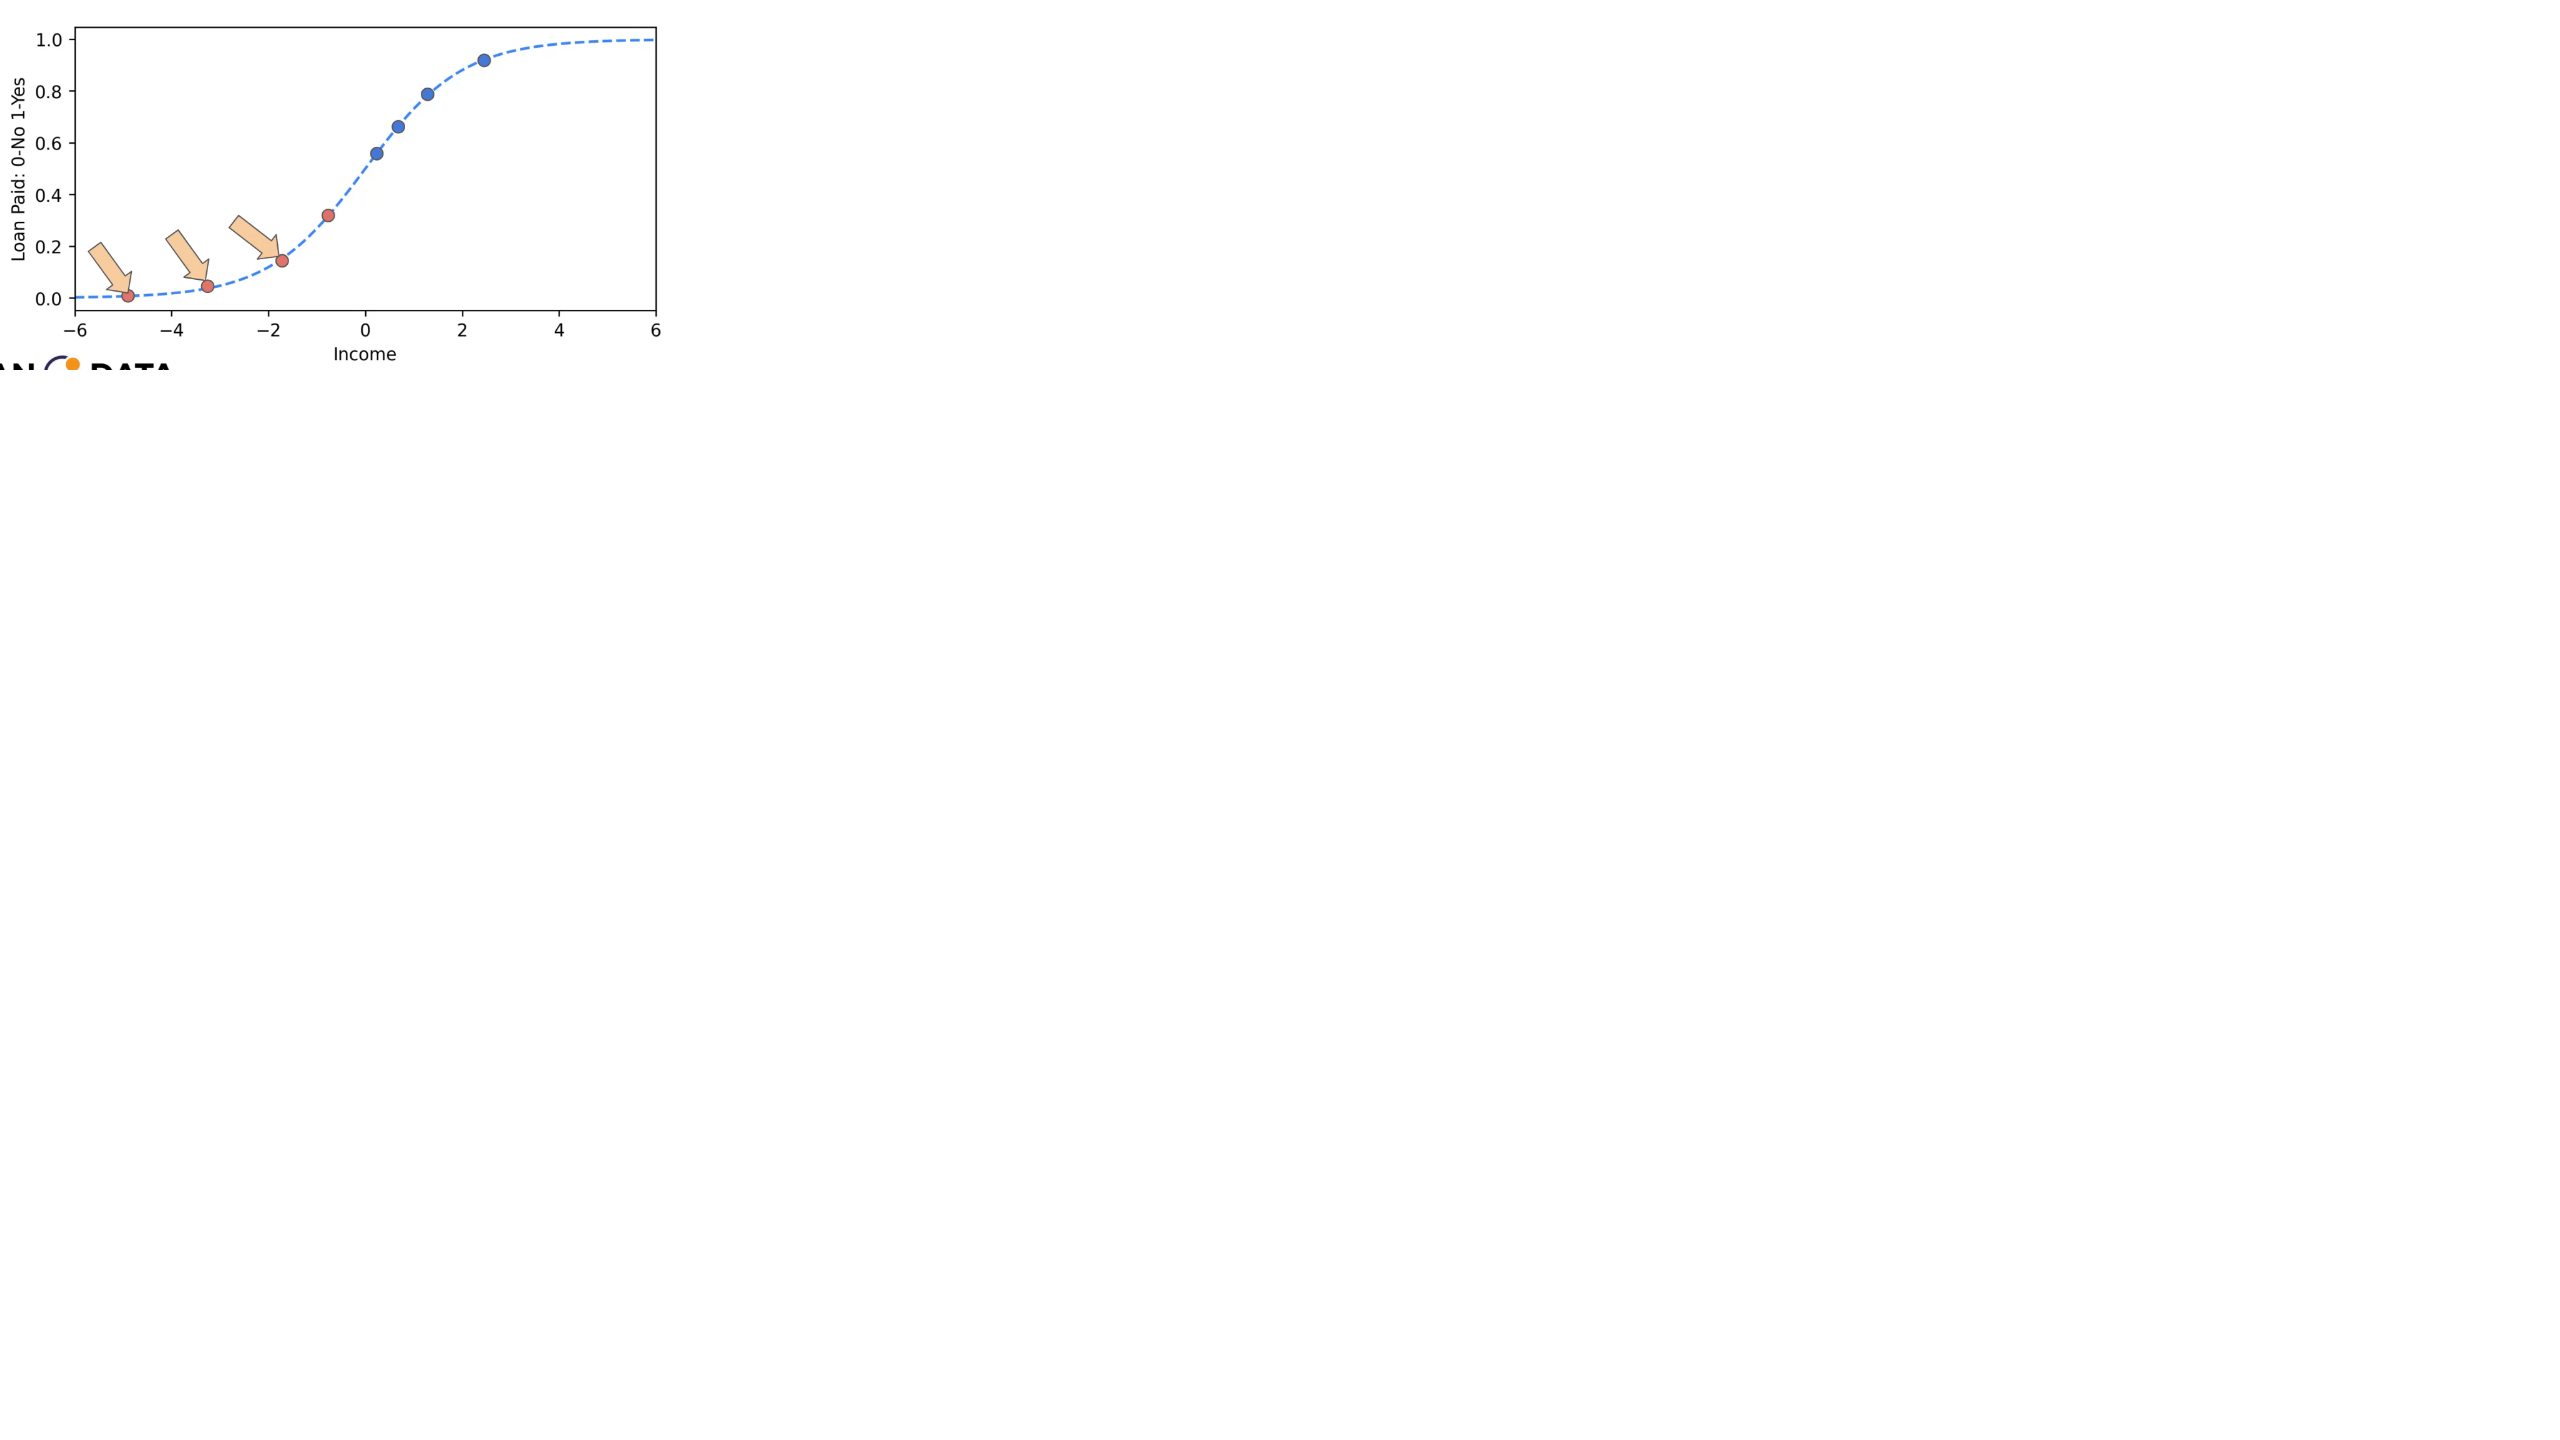

In [8]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\11-Logistic-Regression-Models\12.png")

* There is some set of coefficients that will maximize these log likelihoods
    * Choose best coefficient values in log odds terms that creates maximum likelihood (as far as predicting the correct class class for these trading data points)
    * And so what I can do is start experimenting with these different lines, essentially continually adjusting this line if it calculate those maximum likelihoods and continues this until find the best fitting set of coefficient values
    * while we are trying to **maximize** the likelihood, we still need something to **minimize**, since the computer's *gradient descent methods can only search for minimums*
    * In terms of a cost function, we seek to minimize the following (log loss):
        * $J(x) = -\frac{1}{m}(\sum_{j=1}^{m}y^{j}\log(\hat{y}^j) + (1-y^j)\log(1-\hat{y}^{j})$
        * $J(x) = -\frac{1}{m}(\sum_{j=1}^{m}y^{j}\log(\frac{1}{1+e^{-\sum_{i=0}^n\beta_ix_i}}) + (1-y^j)\log(1-\frac{1}{1+e^{-\sum_{i=0}^n\beta_ix_i}})$
        * Just as with Linear Regression, gradient descent can solve this for us
        * Don't worry about fully understanding this gradient descent
        * In pratice we never have to implement it  our selves
        * **Main takeaway should be the relationship between log odds and probability**
        * It's a little trickier to directly interpret the coefficients when it comes to logistic regression versus linear regression

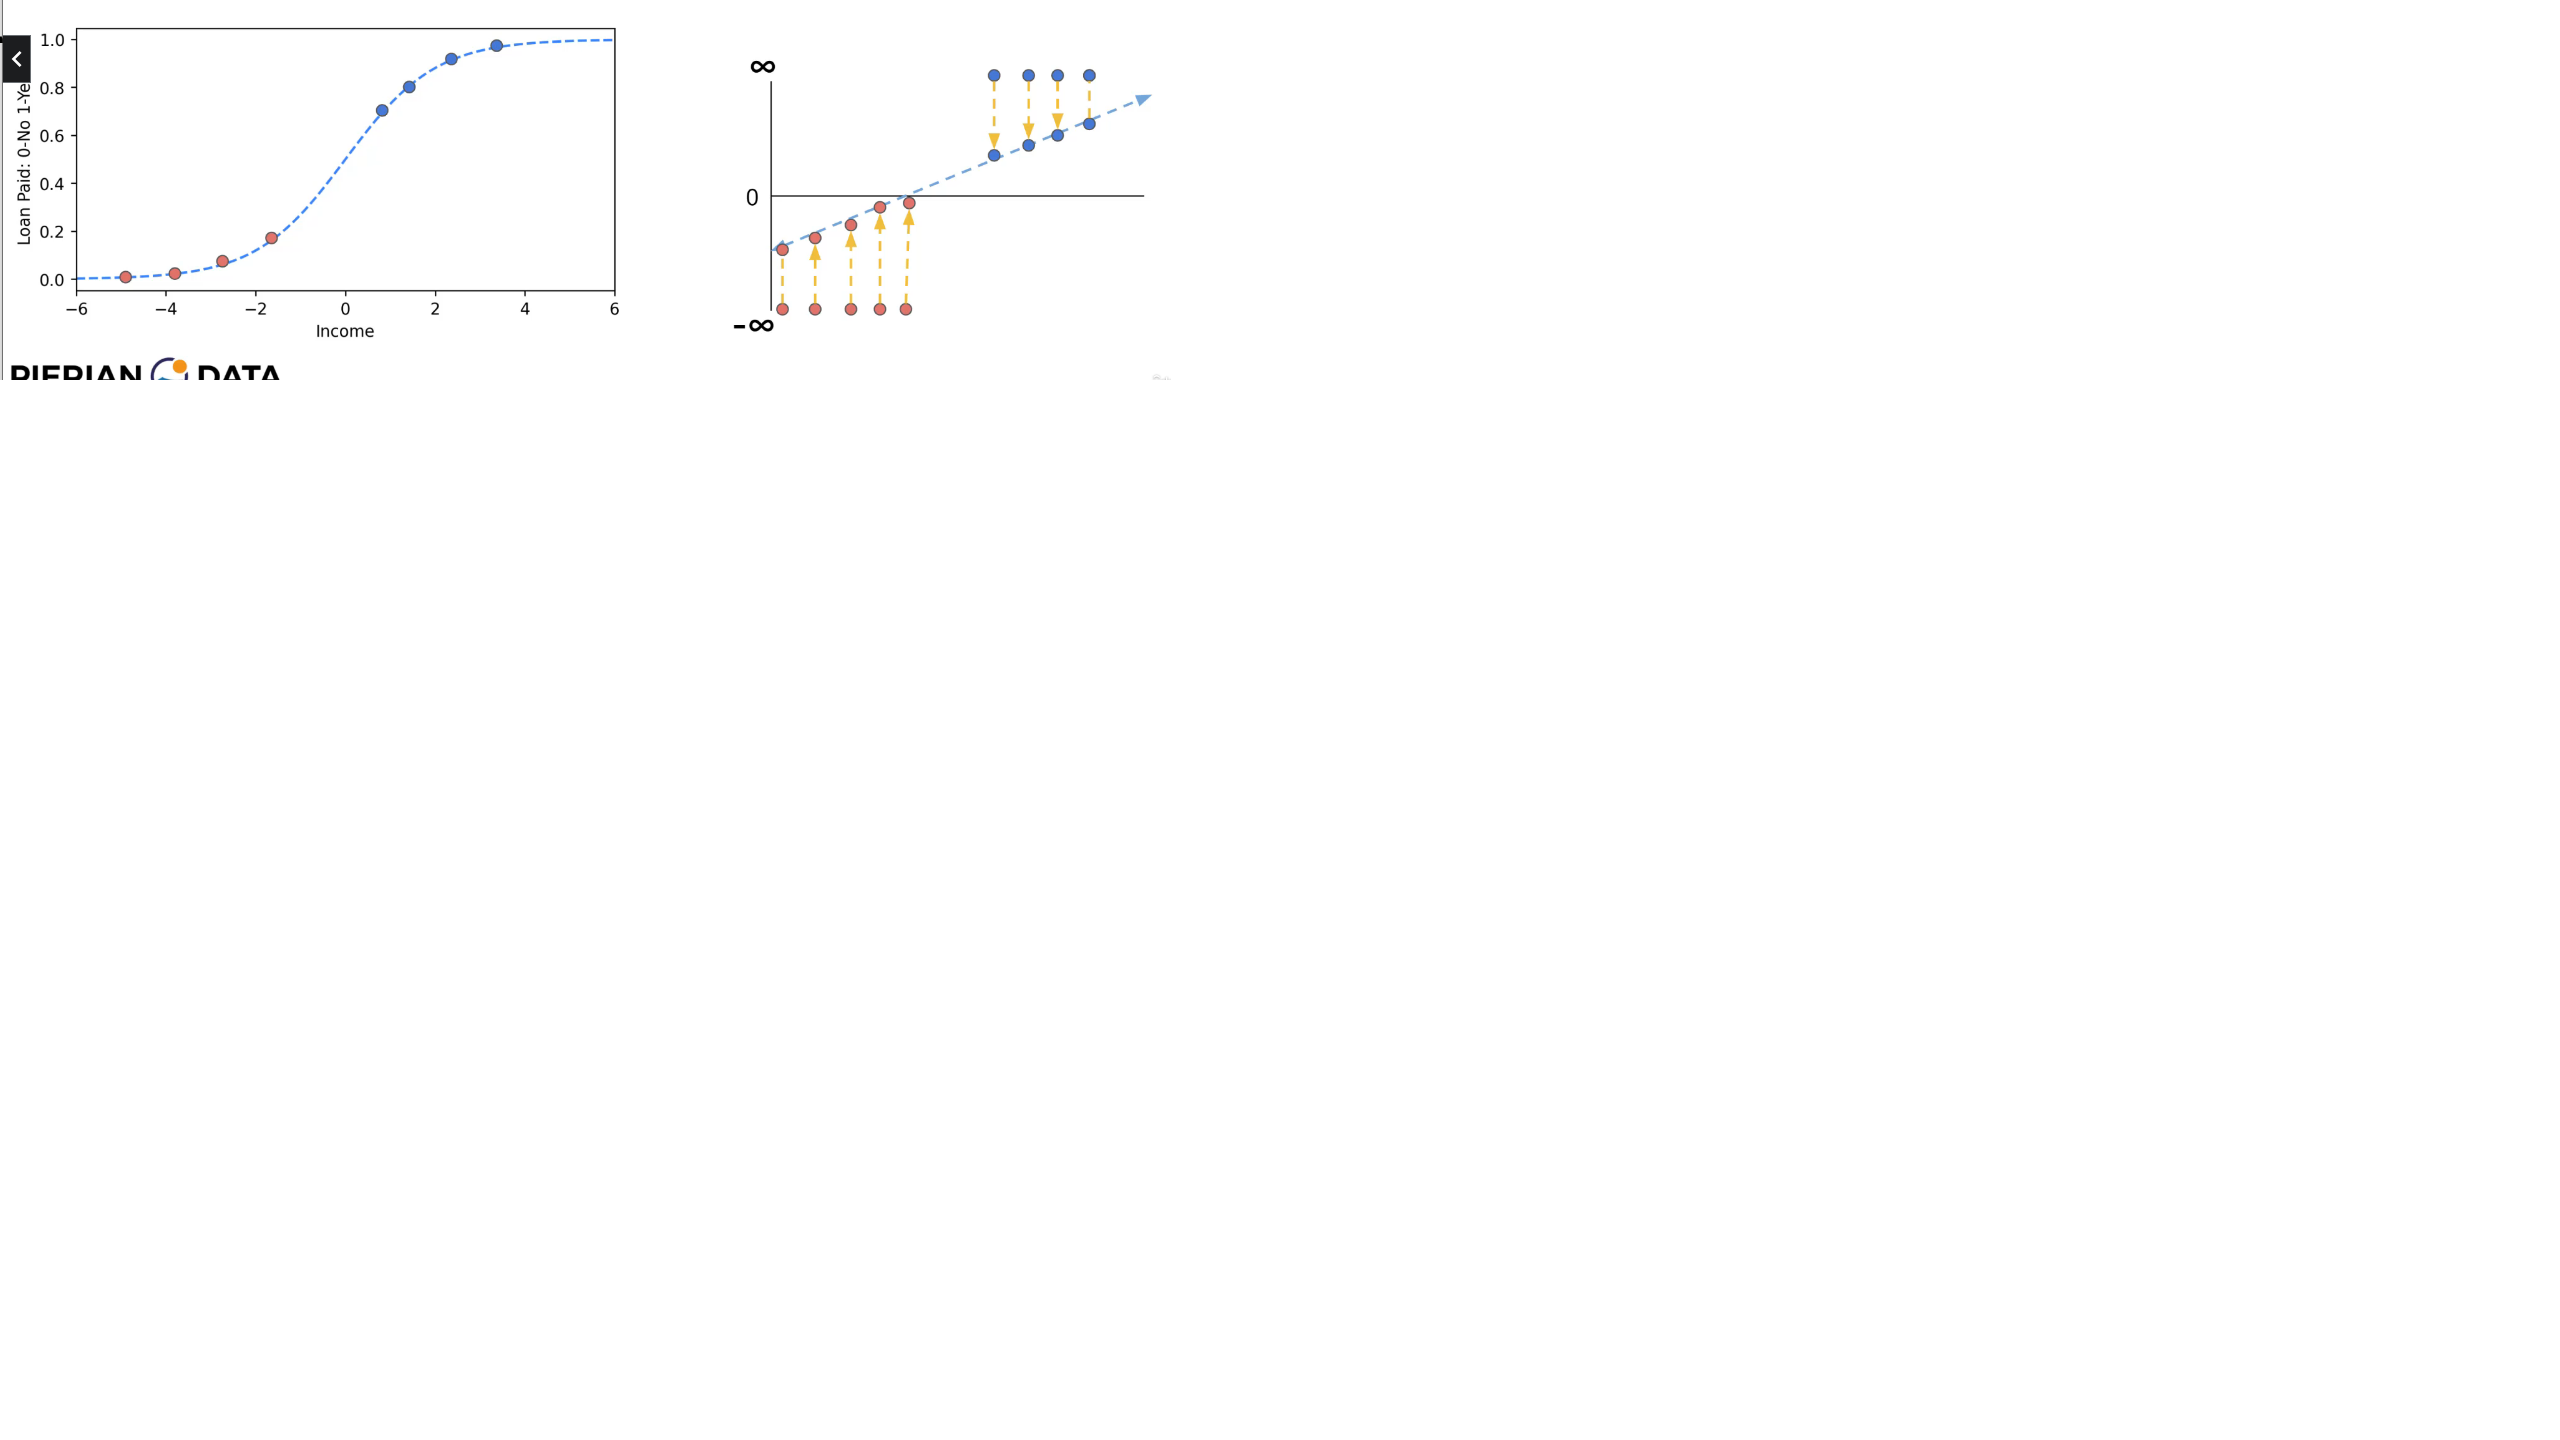

In [9]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\11-Logistic-Regression-Models\13.png")